In [327]:
import datetime
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [277]:
df = pd.read_csv('data/Klub Kouzelníků_2019_07_01 01_43-total.csv', encoding='utf-8', engine='python', 
                 quotechar='"', verbose=True)
# df = pd.read_csv('data/Klub Kouzelníků_ Immortal_2018_11_17 12_43.csv', encoding='utf-8', engine='python', 
#                  quotechar='"', verbose=True)
# df = pd.read_csv('data/Klub Kouzelníků_ Immortal_2018_11_17 12_43-stub.csv', encoding='utf-8', engine='python', 
#                  quotechar='"', verbose=True)
# df = pd.read_csv('data/Klub Kouzelníků_ Immortal_2018_11_17 12_43-stub-2.csv', encoding='utf-8', engine='python', 
#                  verbose=True, header=0, index_col=False)
# df = pd.read_csv('data/Klub Kouzelníků_ Immortal_2018_11_17 12_43-stub-2.csv', encoding='utf-8', engine='python')
df = df.reset_index()
df.columns = ["Date","Time","UserID","UserName","MessageBody"]
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.drop(columns=['Date', 'Time'])

Filled 15768 NA values in column Date


In [278]:
df.describe()

,UserID
count,5.928480e+05
mean,8.486530e+13
std,3.584158e+13
min,1.125265e+09
25%,1.000002e+14
50%,1.000004e+14
75%,1.000011e+14
max,1.000358e+14


In [279]:
df.head(10)

,UserID,UserName,MessageBody,DateTime
0,1764877696,Michal Svoboda,Za celý prázdniny,2017-06-14 14:46:39
1,100000219586446,Daniel Lečo Le,Pak nejaky videjka a fotecky pls,2017-06-14 14:46:40
2,100000455812182,Lukáš Aaron Tesař,jsem si uvědomil jednu věc,2017-06-14 14:46:48
3,100000455812182,Lukáš Aaron Tesař,budu chlastat 23.,2017-06-14 14:46:52
4,100000455812182,Lukáš Aaron Tesař,pak 8.,2017-06-14 14:46:55
5,100000455812182,Lukáš Aaron Tesař,a pak na Adviku,2017-06-14 14:46:58
6,100000219586446,Daniel Lečo Le,Kdy je ta parba u Furika btw?,2017-06-14 14:47:01
7,100000455812182,Lukáš Aaron Tesař,a jestli bude i Igorrr,2017-06-14 14:47:03
8,100000455812182,Lukáš Aaron Tesař,no do píči :D,2017-06-14 14:47:05
9,100000455812182,Lukáš Aaron Tesař,co vole?,2017-06-14 14:47:09


In [280]:
df.dtypes

UserID                  int64
UserName               object
MessageBody            object
DateTime       datetime64[ns]
dtype: object

### Some basic statistics


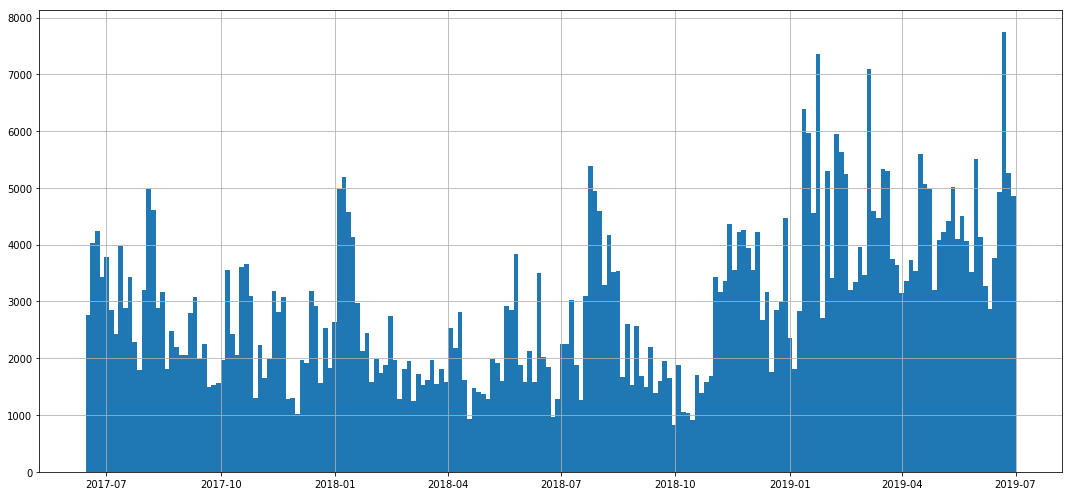

In [299]:
df['DateTime'].hist(bins=200, figsize=(15, 7))
plt.tight_layout()
plt.savefig('kouzelnici-total-hist.png')

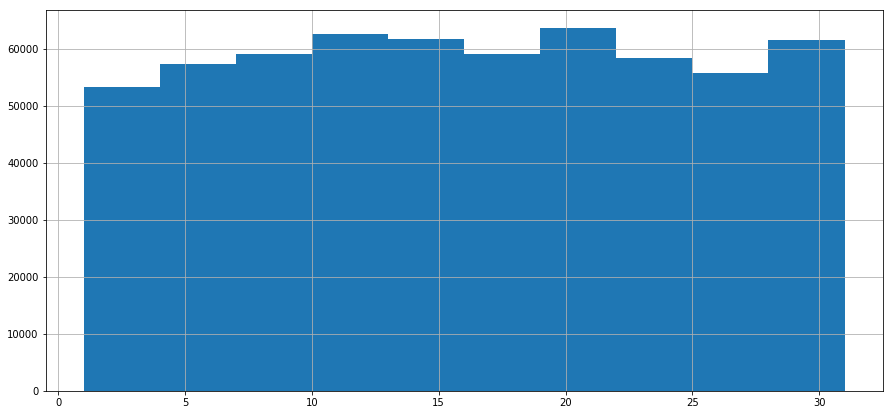

In [291]:
df['DateTime'].dt.day.hist(figsize=(15, 7))

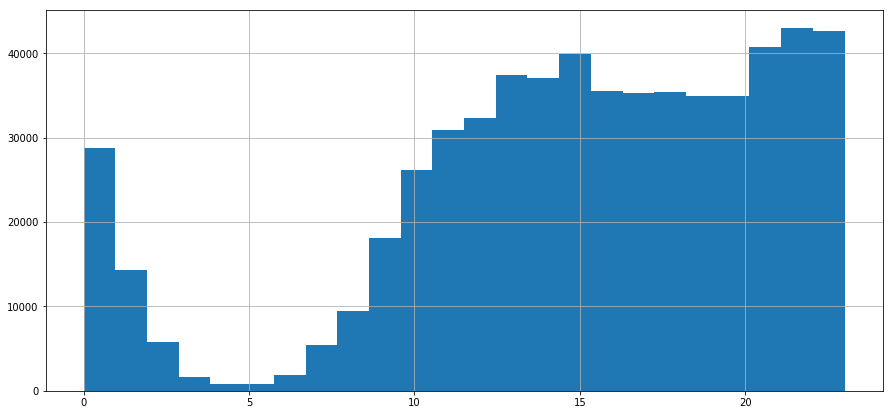

In [292]:
df['DateTime'].dt.hour.hist(bins=24, figsize=(15, 7))

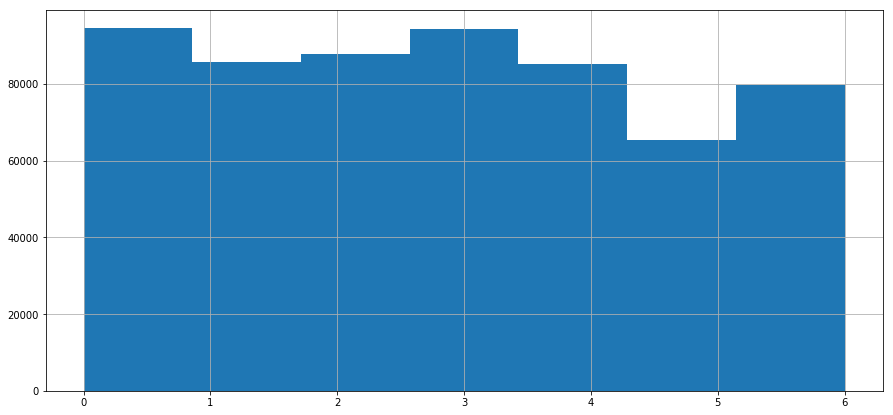

In [293]:
df['DateTime'].dt.dayofweek.hist(bins=7, figsize=(15, 7))

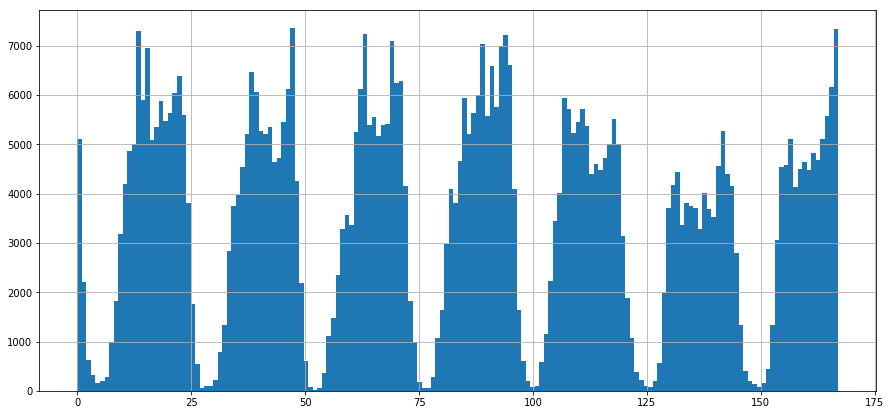

In [294]:
(df['DateTime'].dt.dayofweek * 24 + df['DateTime'].dt.hour).hist(bins=24 * 7, figsize=(15, 7))

In [295]:
df['UserName'].value_counts()

Niko Albert                     46883
Dominik Krisztof                45334
Adam Krása                      42436
Filip Tran                      33533
Michal Mikuš                    33185
Adam Furik                      27024
Zdeněk Pešek                    26954
Daniel Lečo Le                  26525
Lucas Dičér                     26474
Michal Fox Řehák                23753
Matěj Račinský                  22119
Zdeněk Pala                     21739
Vojtěch Malman Divák            20084
Honza Horgoš                    19490
Lukáš Aaron Tesař               19118
Matěj Fabián                    14813
Petra Zabranská                 13031
Kuba Lysák                      12352
Žožo Králík                     12209
Dominik Lovi Staněk             11778
Michal Svoboda                   9938
Tomáš Krejčíř                    8883
Alexandr Prokič                  8406
Jaroslav Koutník                 5648
Oleksandra Dihuljar              5167
Apolena Gray                     4138
Michal Ulf K

In [296]:
df['UserName'].value_counts()[:35]

Niko Albert                     46883
Dominik Krisztof                45334
Adam Krása                      42436
Filip Tran                      33533
Michal Mikuš                    33185
Adam Furik                      27024
Zdeněk Pešek                    26954
Daniel Lečo Le                  26525
Lucas Dičér                     26474
Michal Fox Řehák                23753
Matěj Račinský                  22119
Zdeněk Pala                     21739
Vojtěch Malman Divák            20084
Honza Horgoš                    19490
Lukáš Aaron Tesař               19118
Matěj Fabián                    14813
Petra Zabranská                 13031
Kuba Lysák                      12352
Žožo Králík                     12209
Dominik Lovi Staněk             11778
Michal Svoboda                   9938
Tomáš Krejčíř                    8883
Alexandr Prokič                  8406
Jaroslav Koutník                 5648
Oleksandra Dihuljar              5167
Apolena Gray                     4138
Michal Ulf K

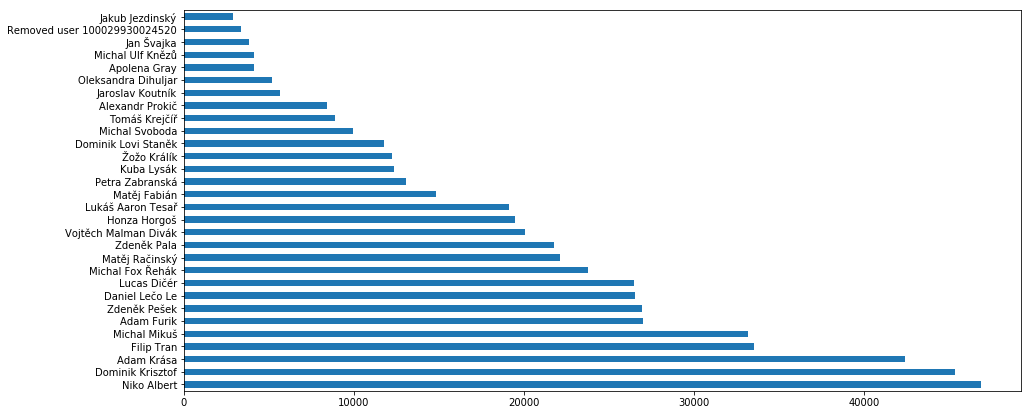

In [297]:
df['UserName'].value_counts()[:30].plot.barh(figsize=(15, 7))

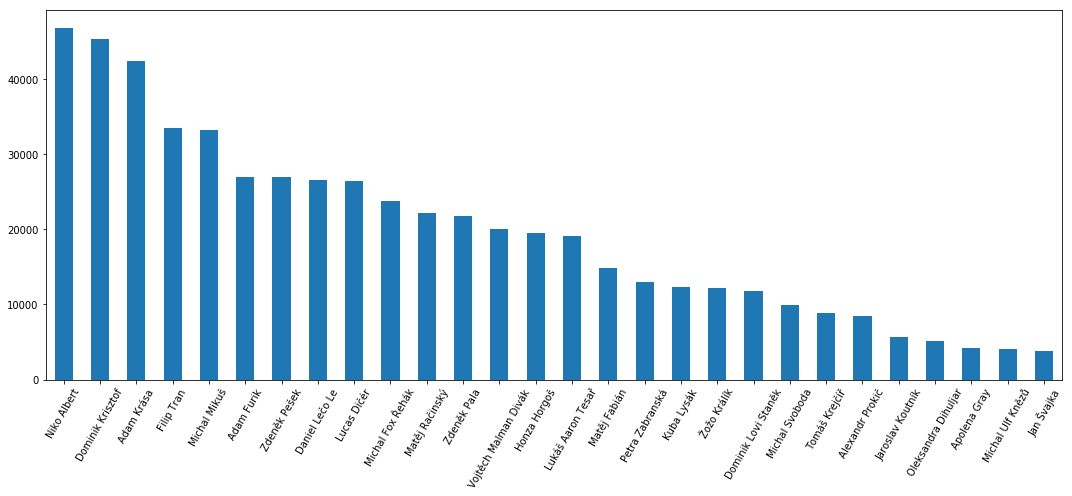

In [302]:
df['UserName'].value_counts()[:28].plot.bar(figsize=(15, 7))
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('kouzelnici-aktivni-clenove.png')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


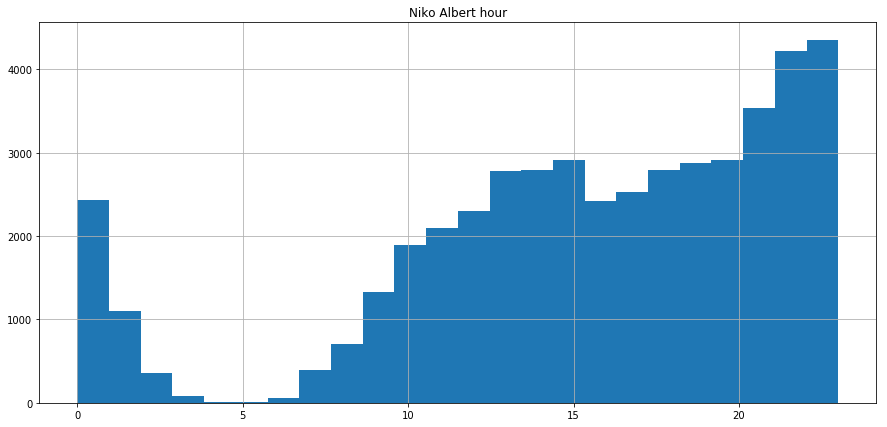

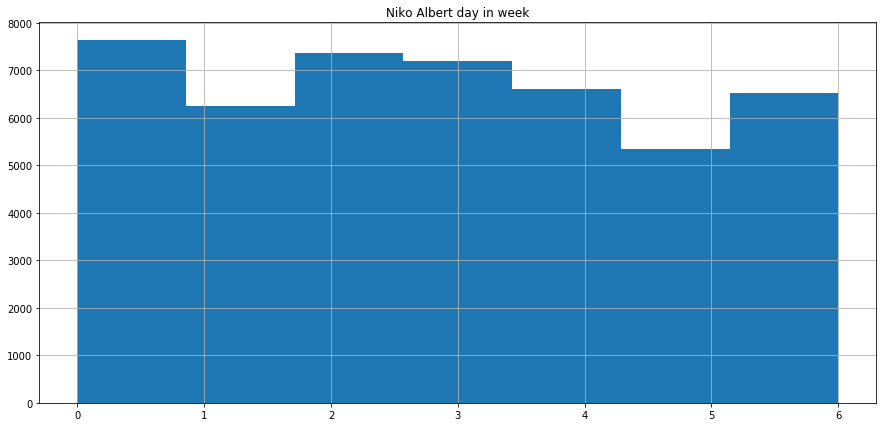

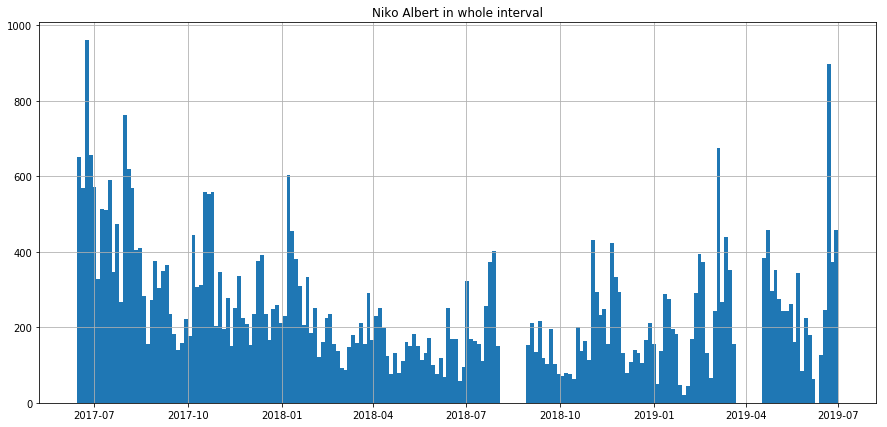

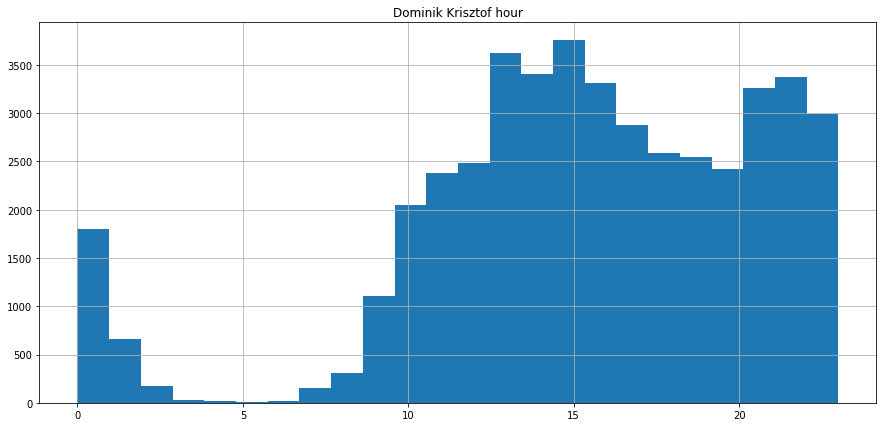

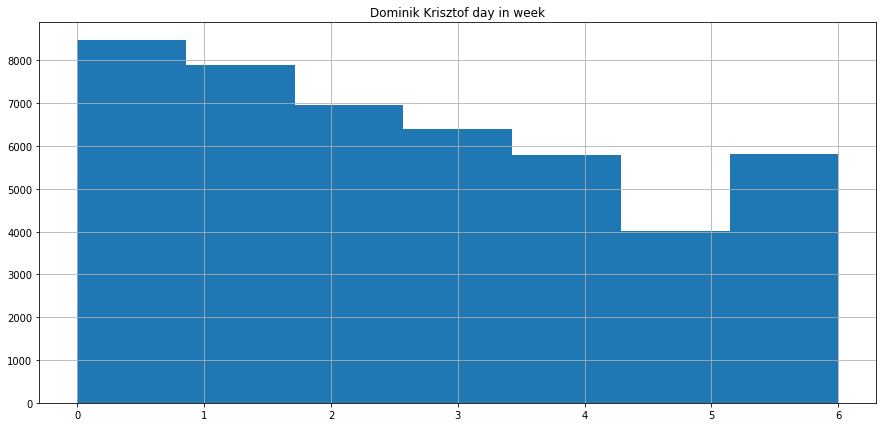

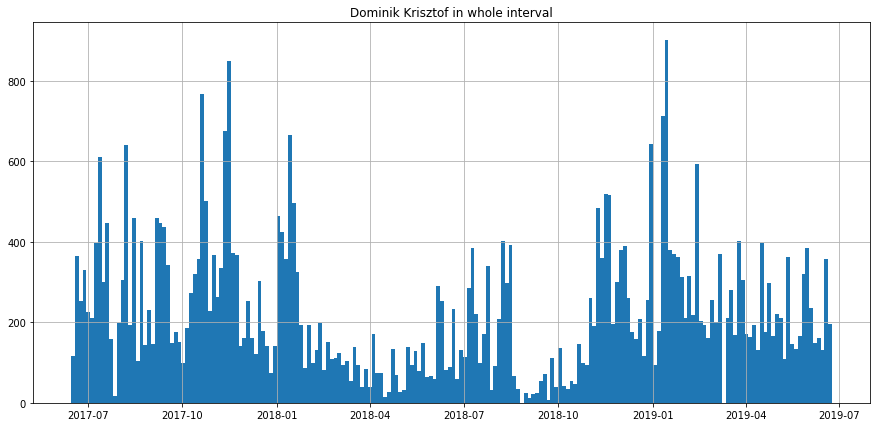

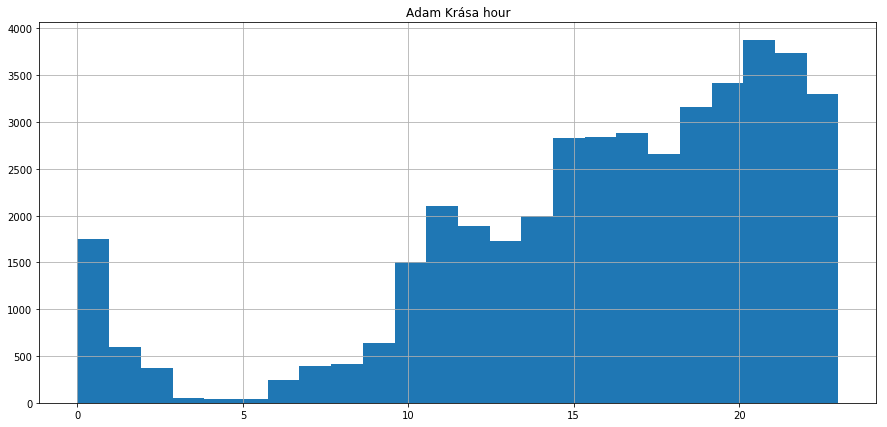

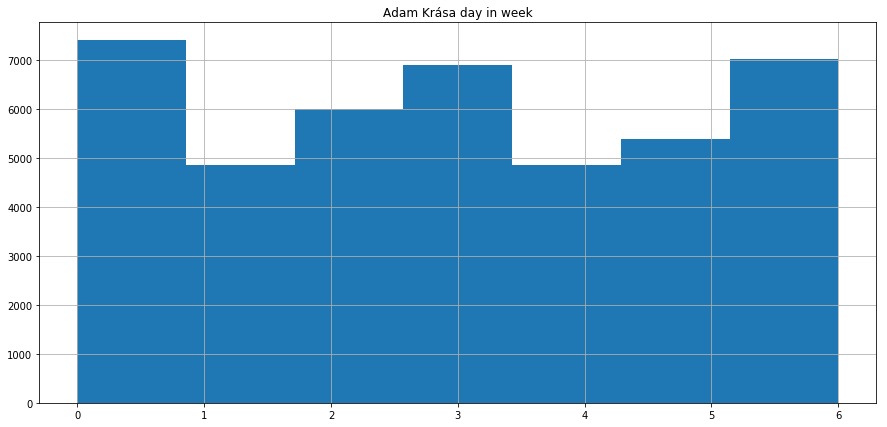

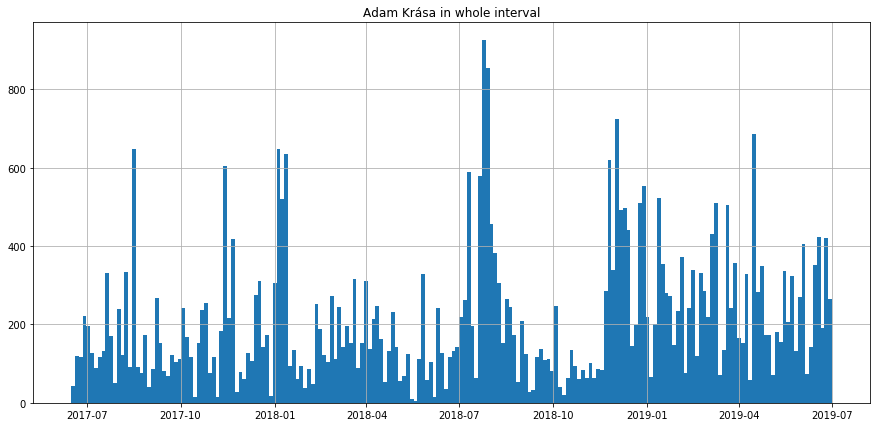

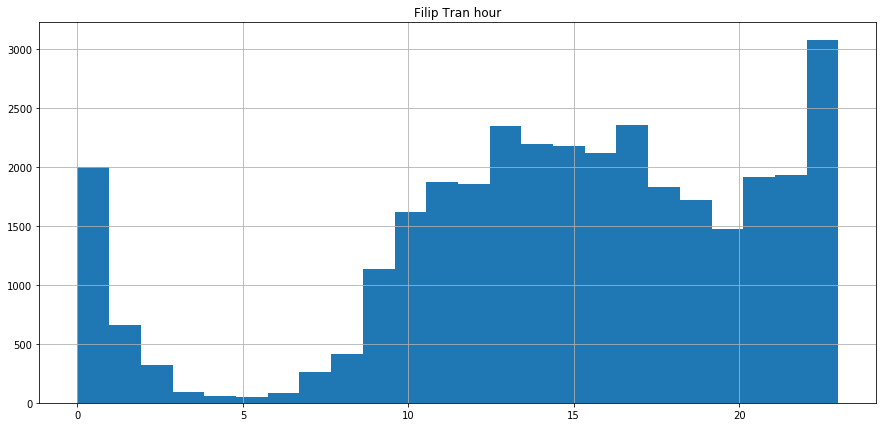

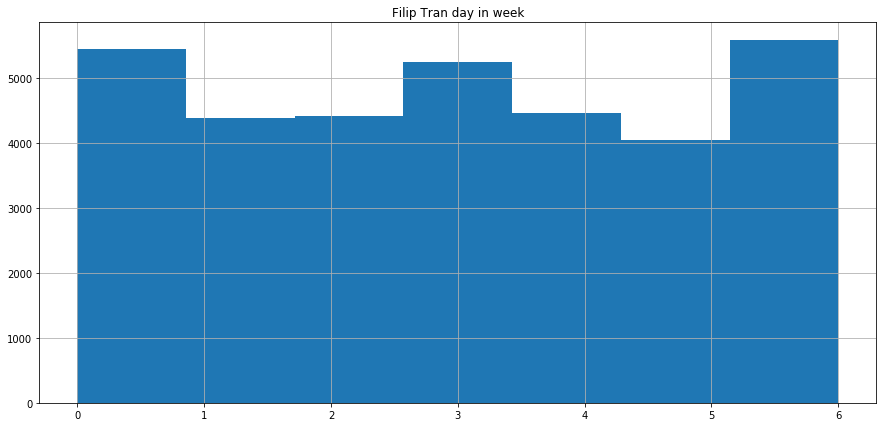

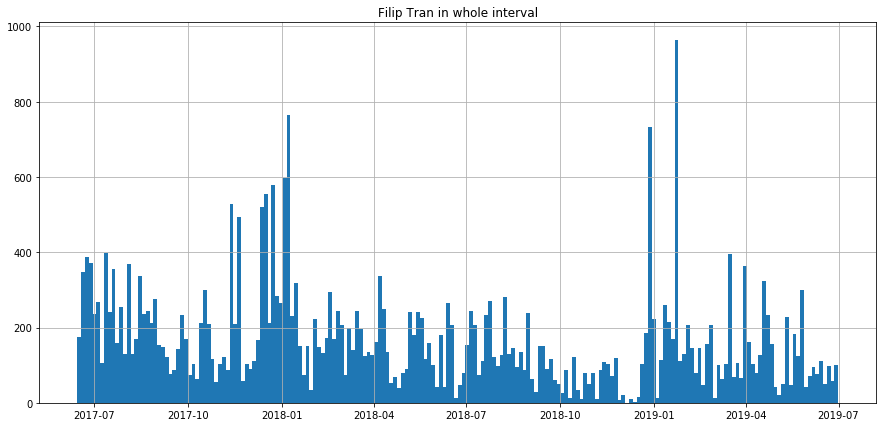

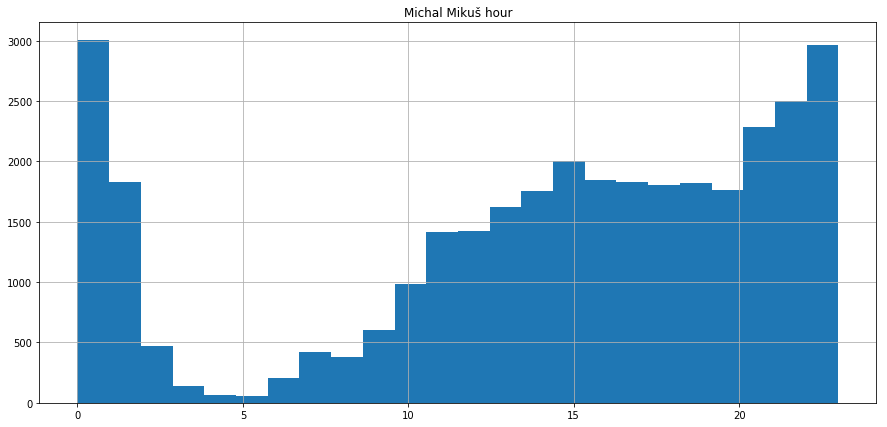

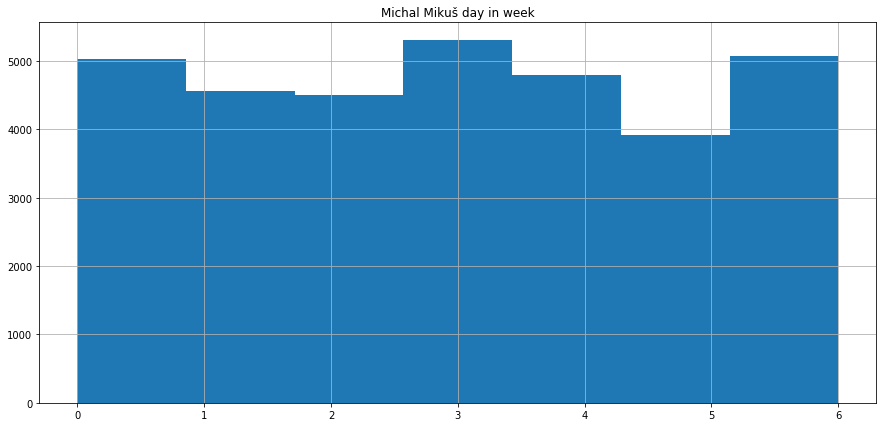

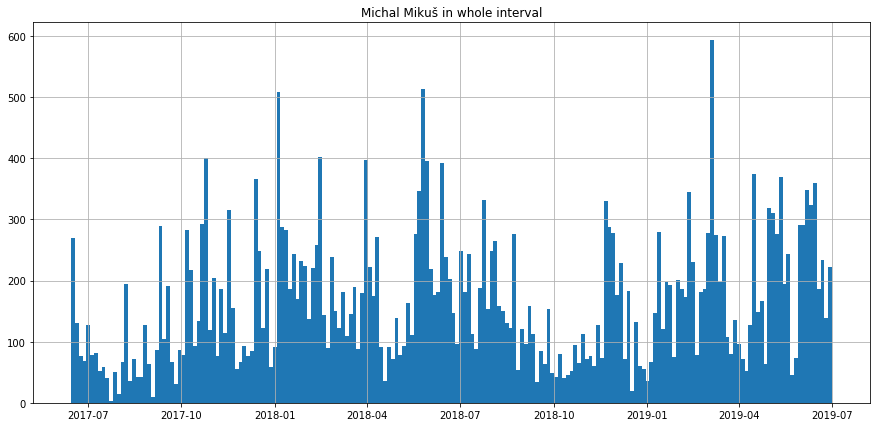

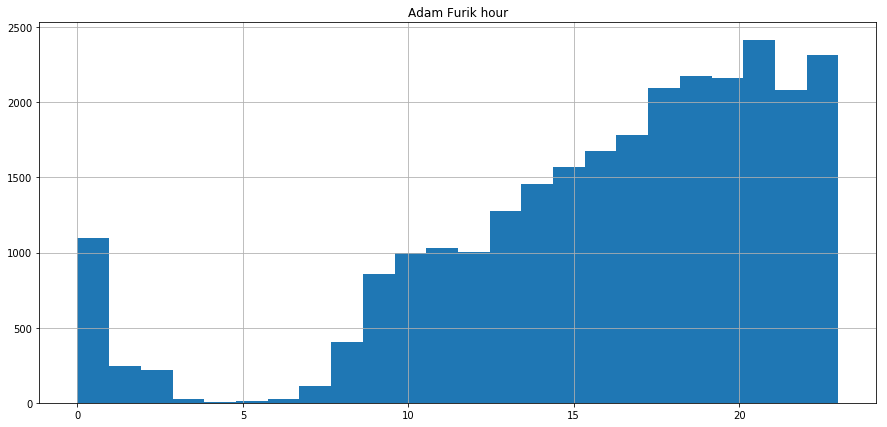

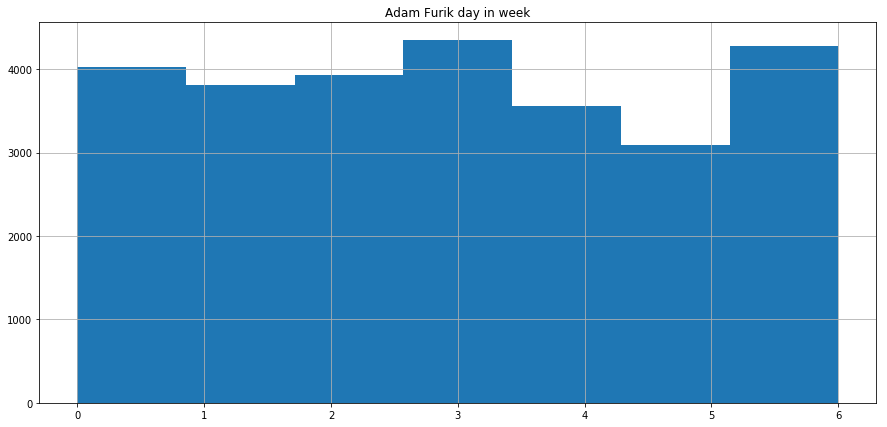

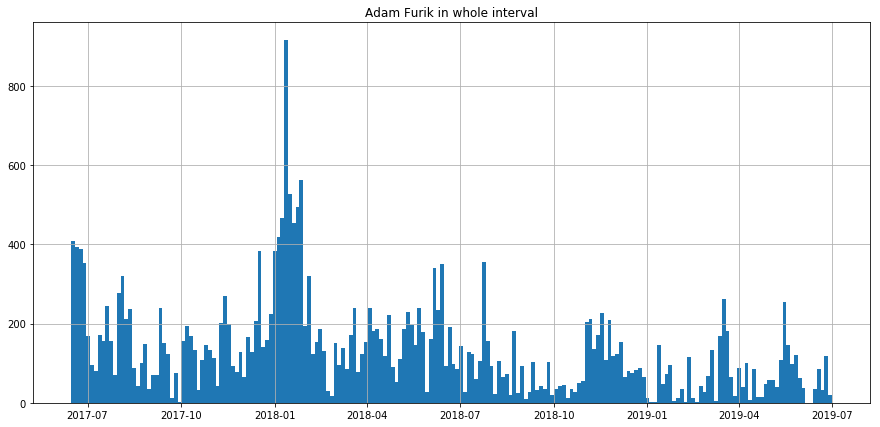

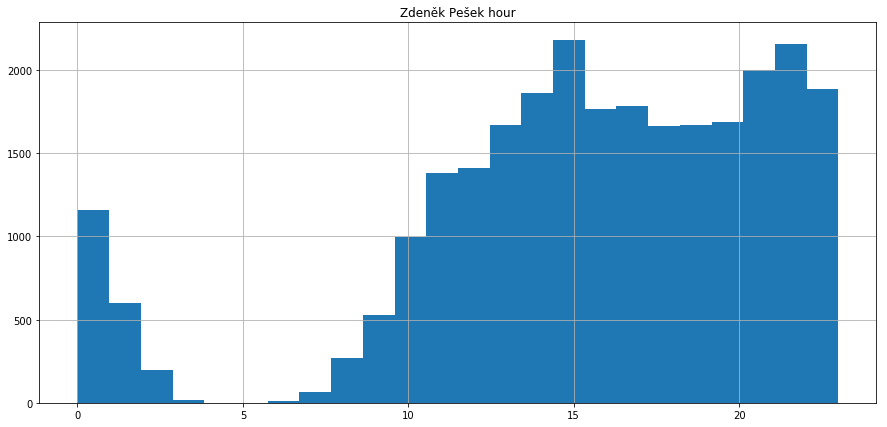

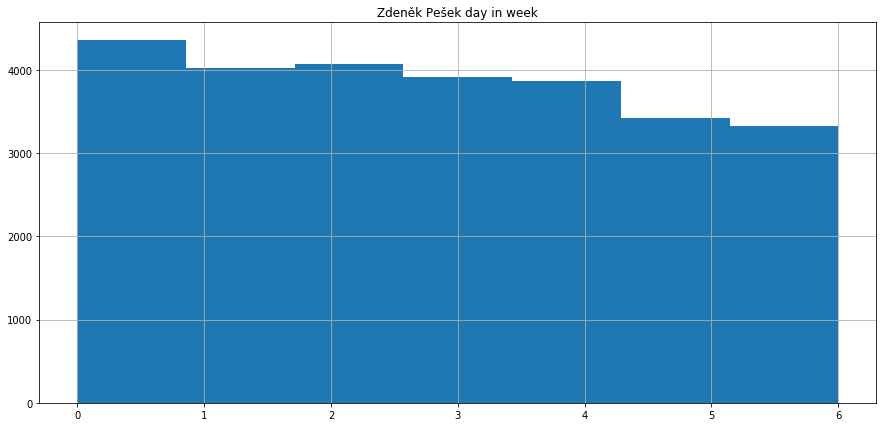

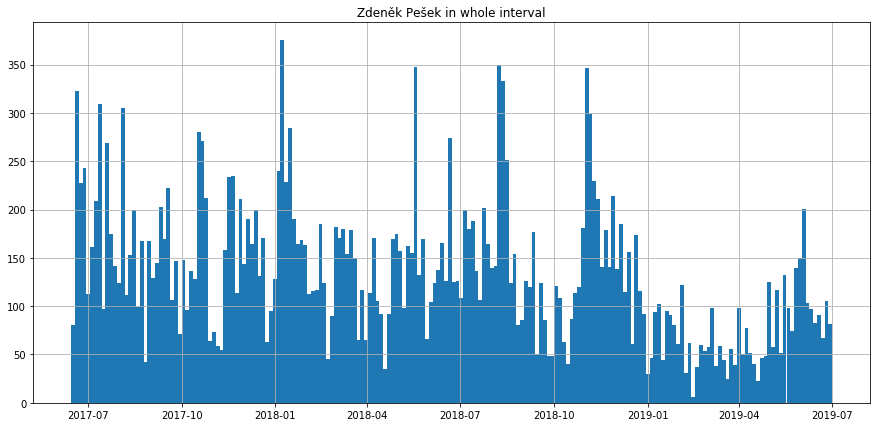

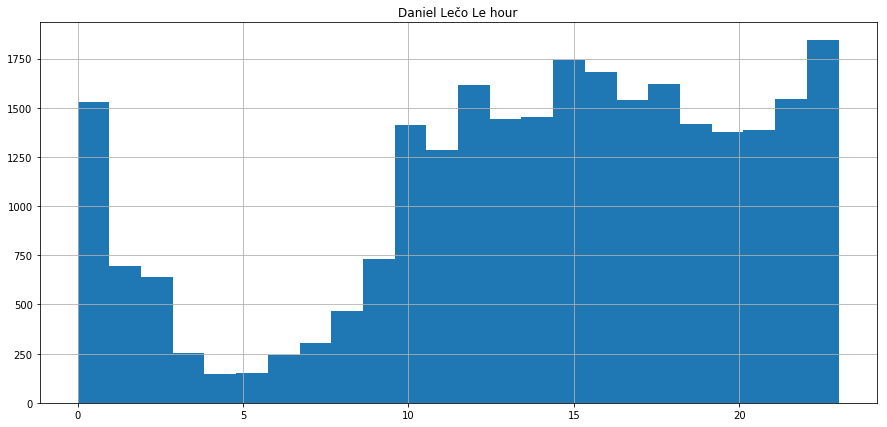

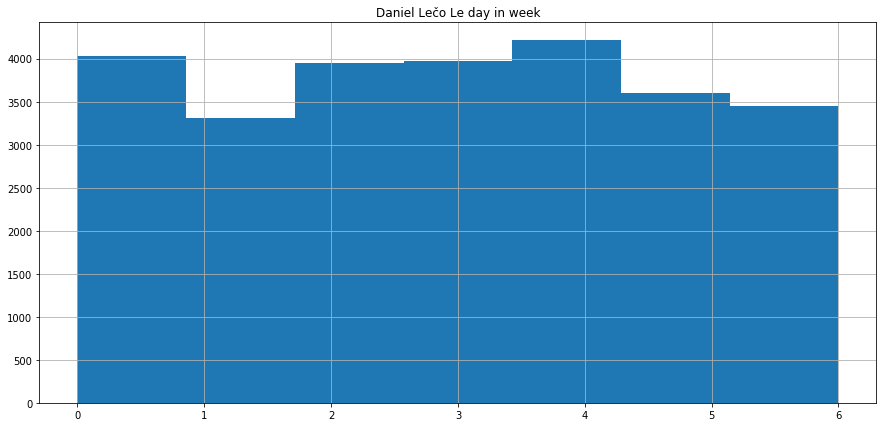

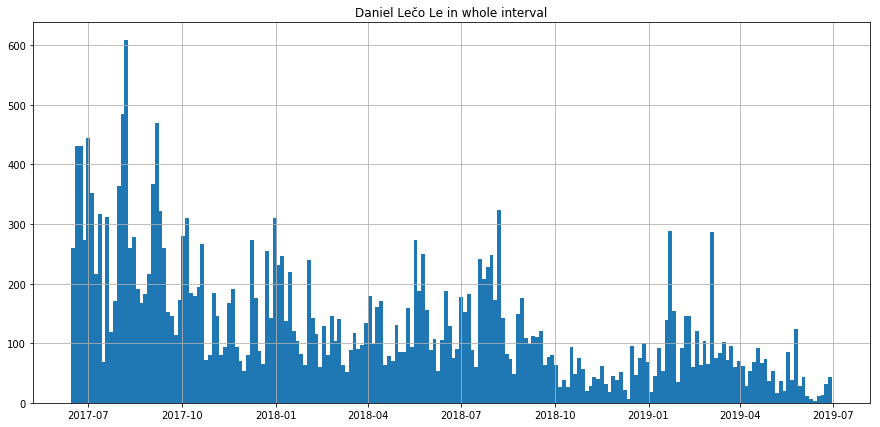

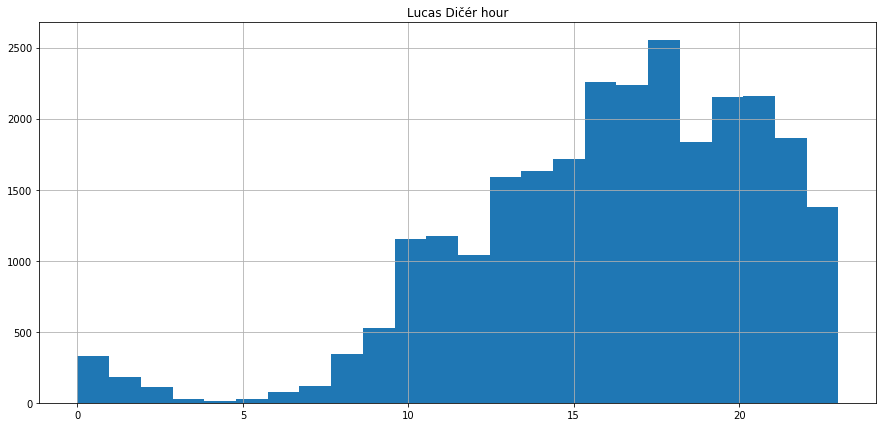

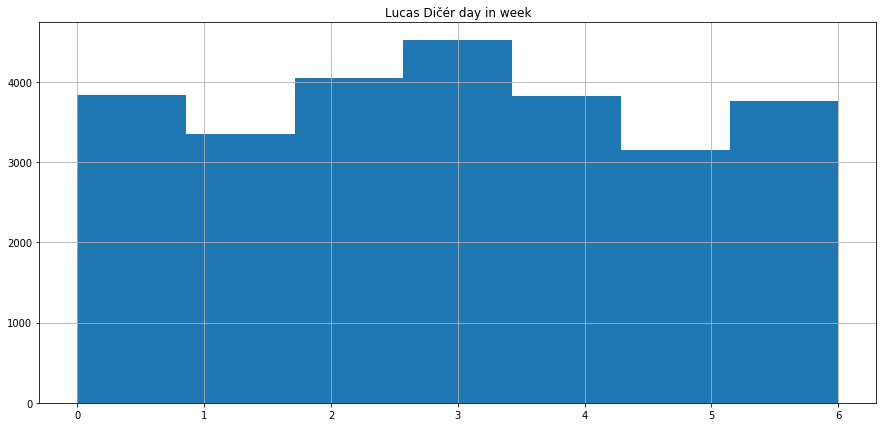

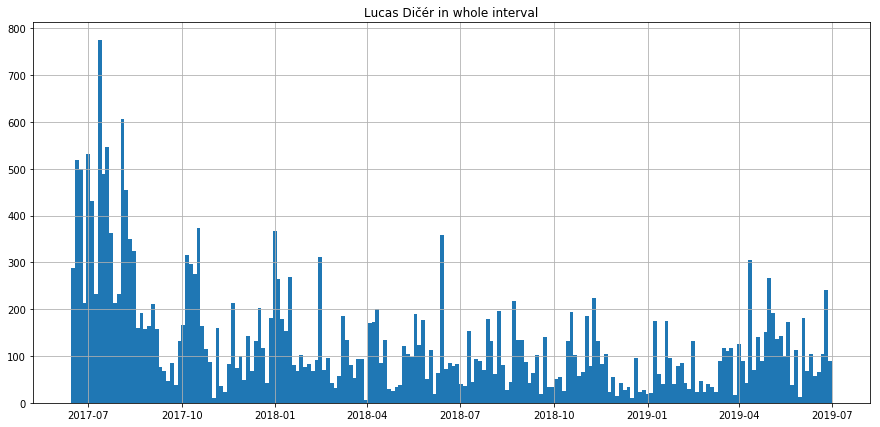

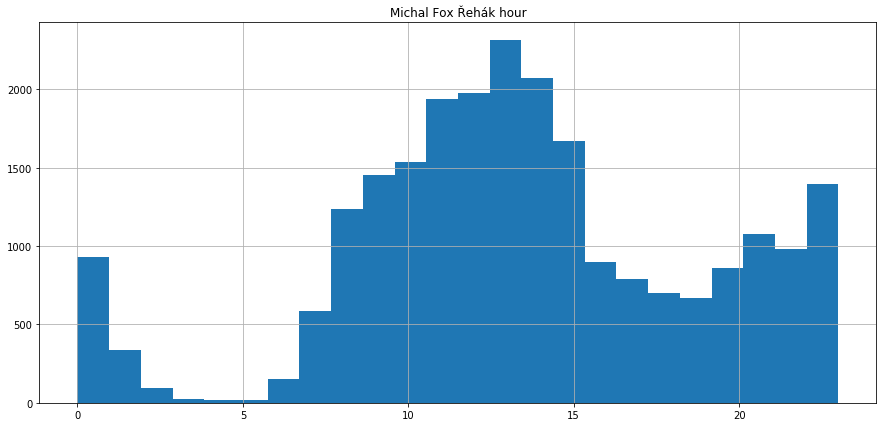

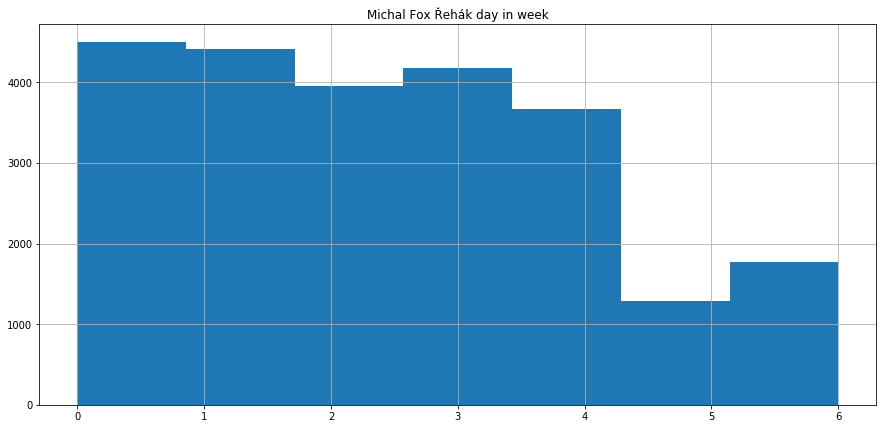

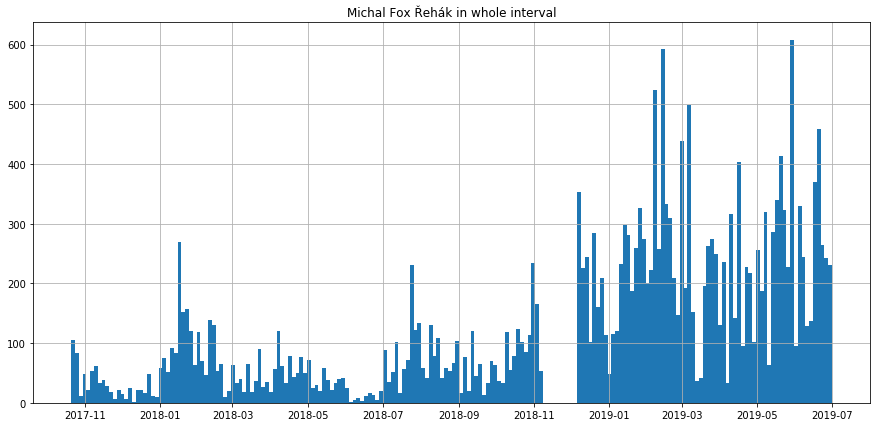

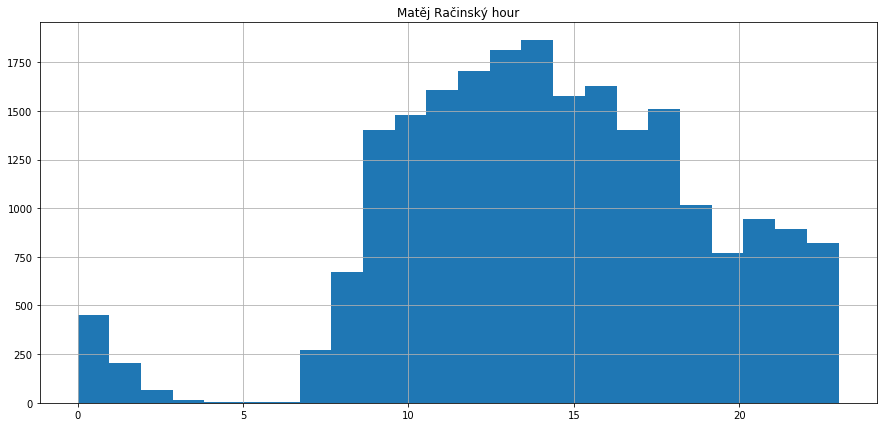

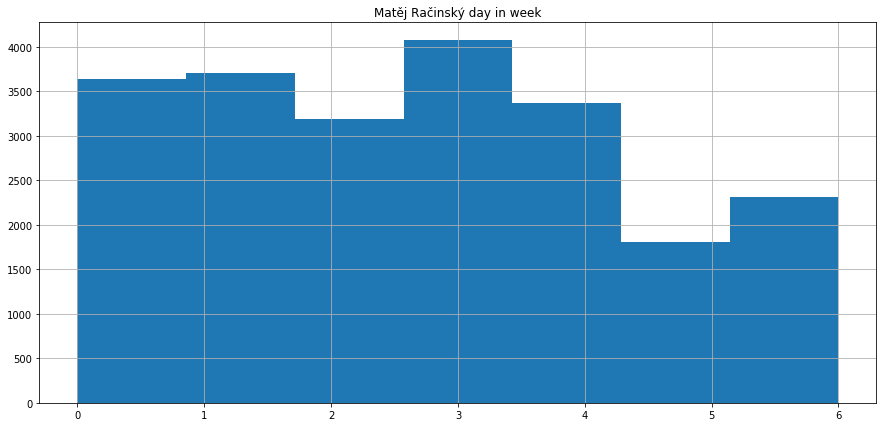

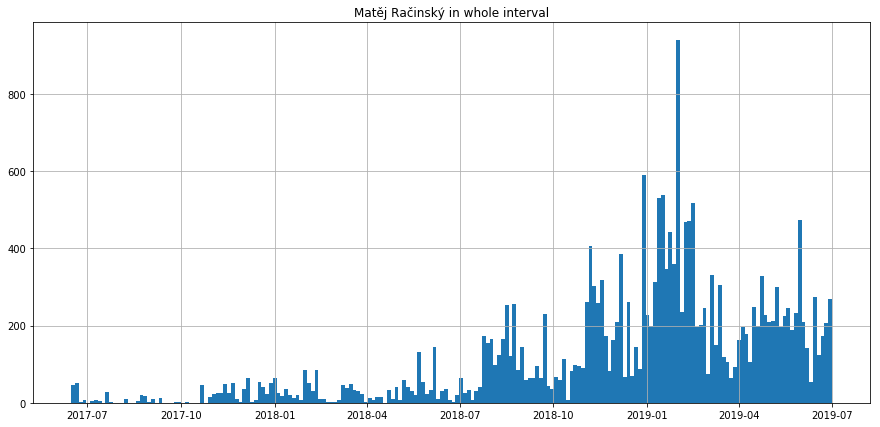

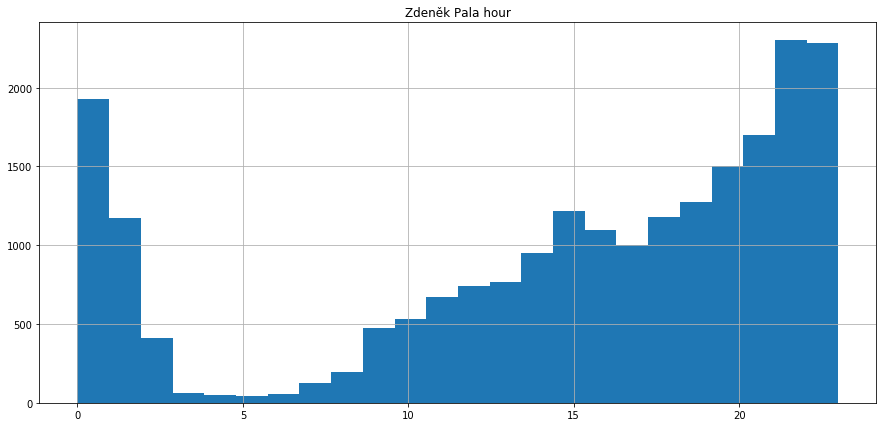

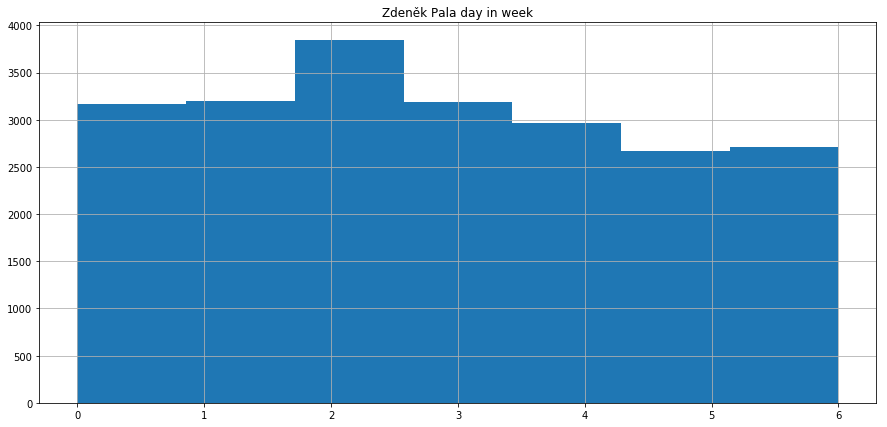

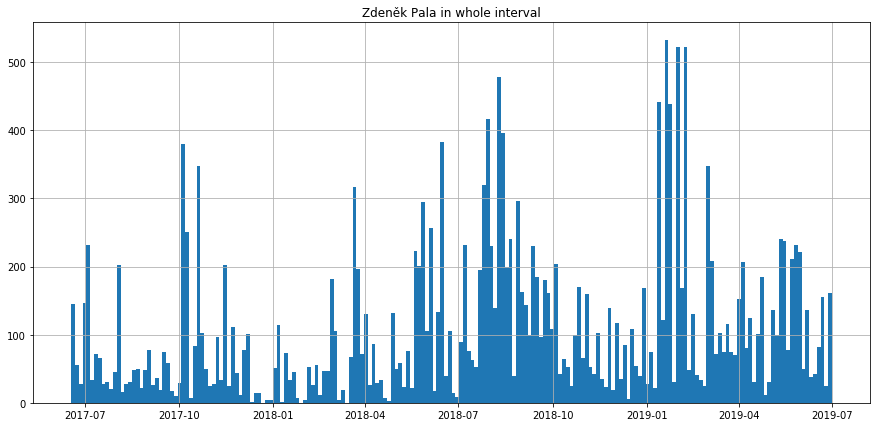

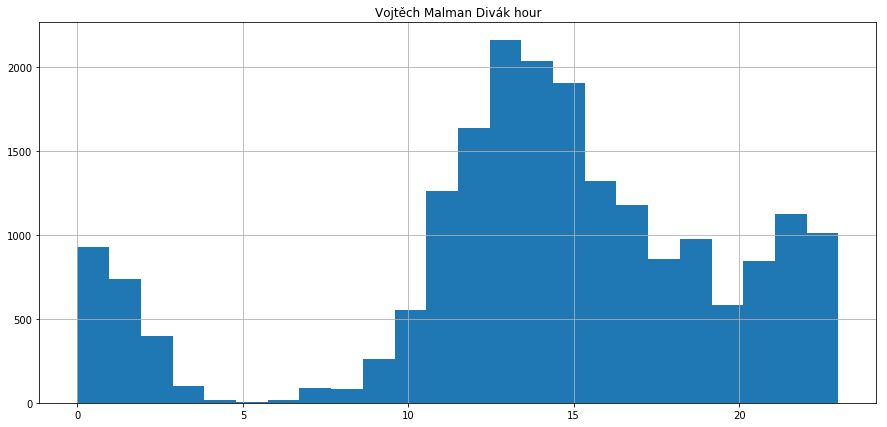

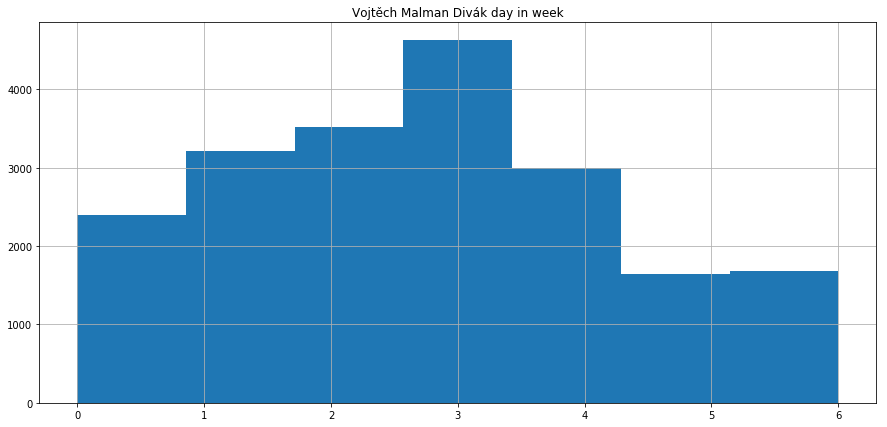

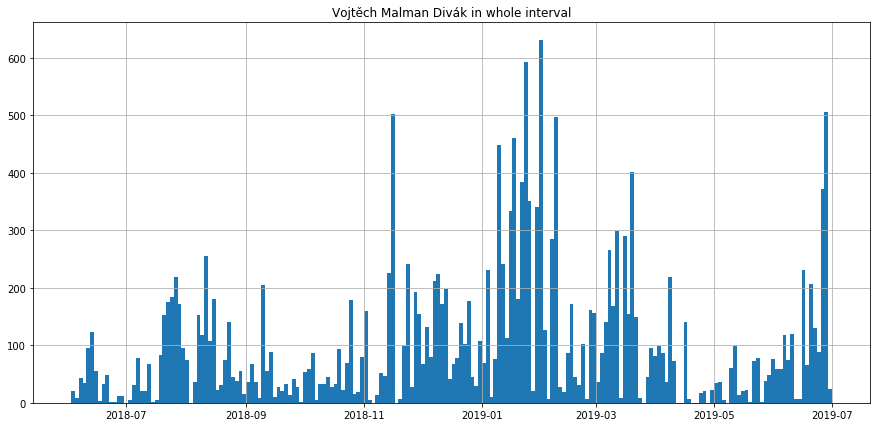

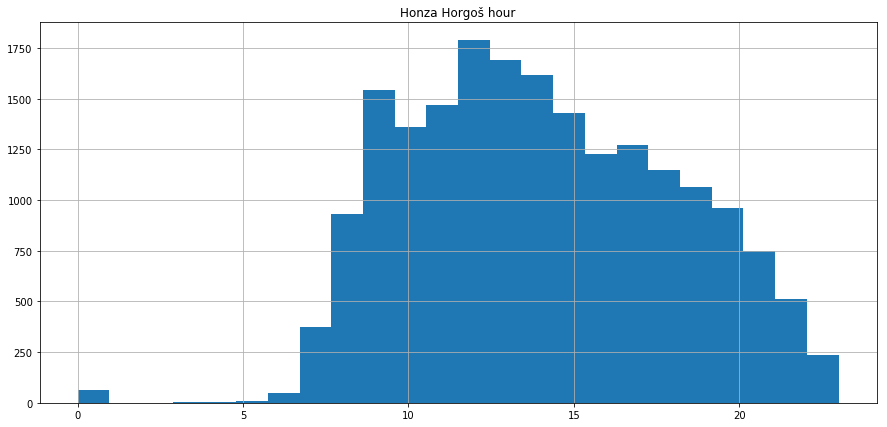

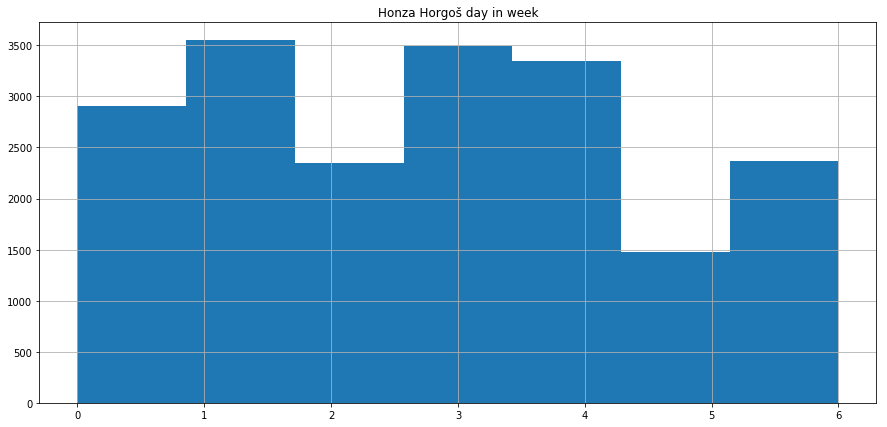

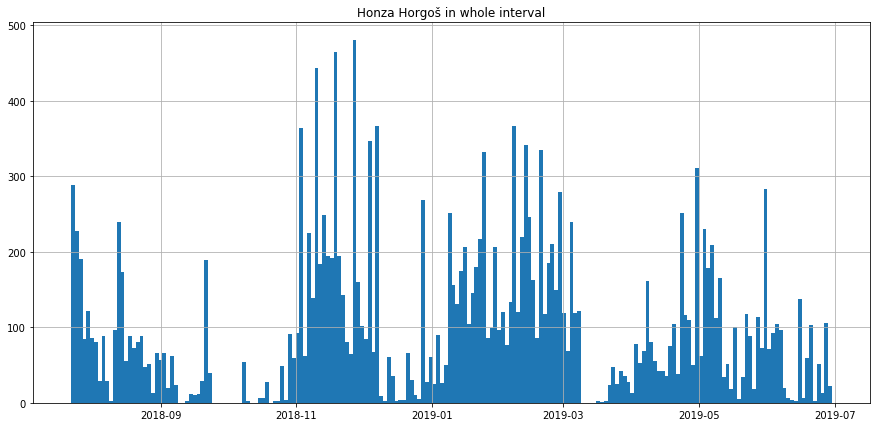

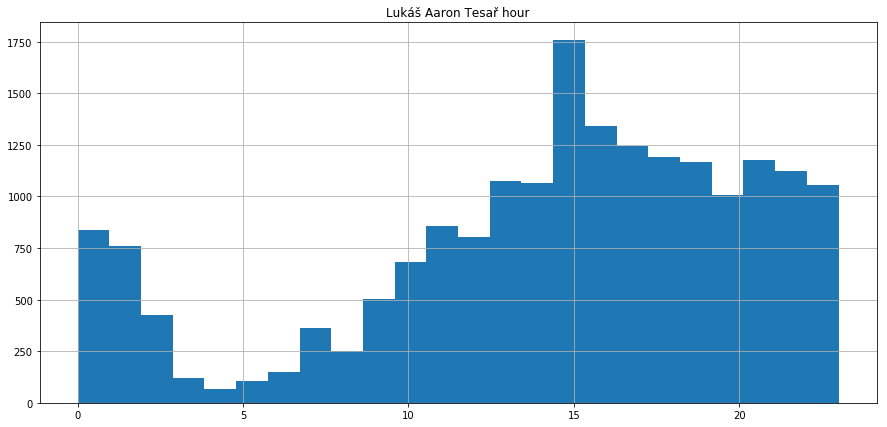

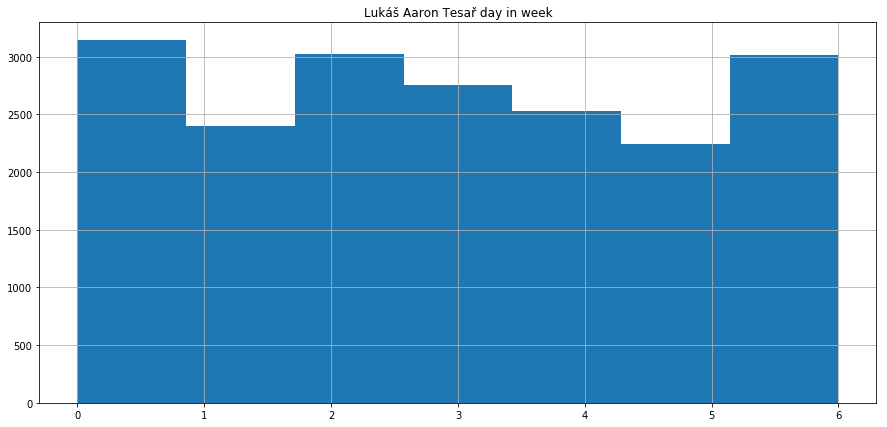

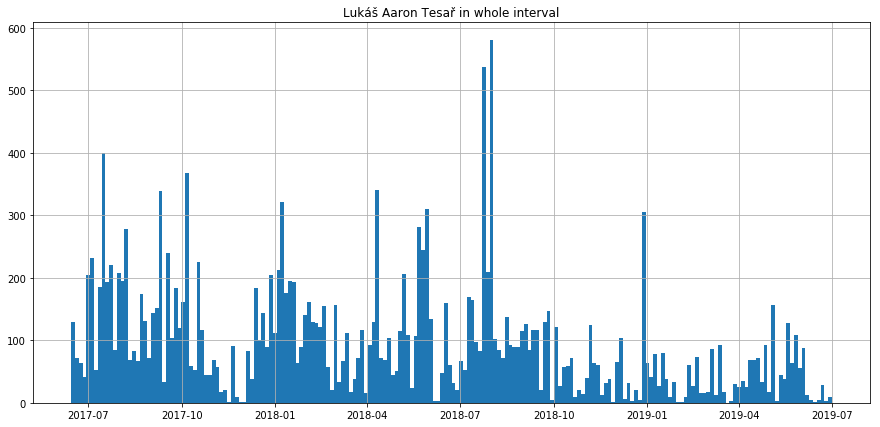

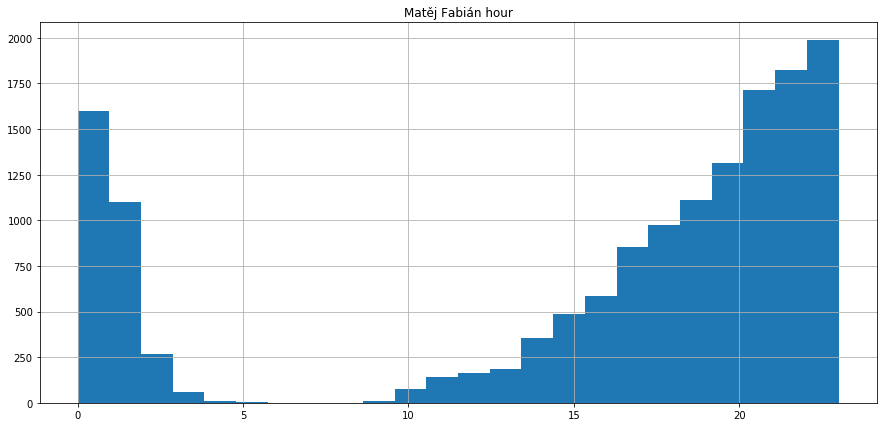

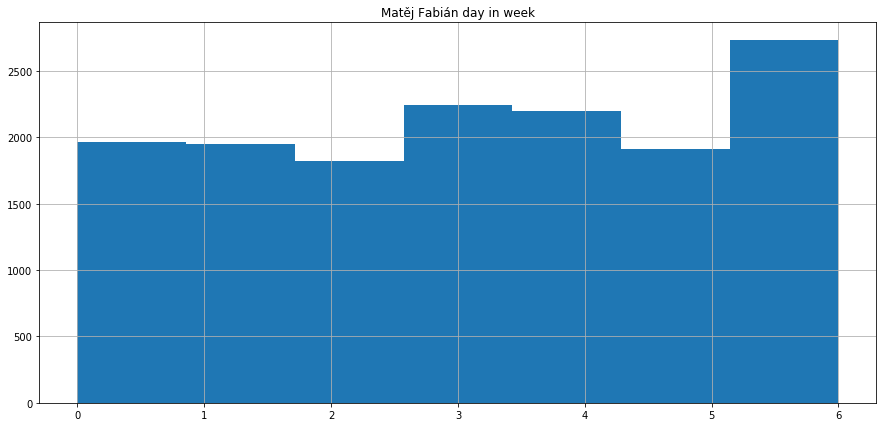

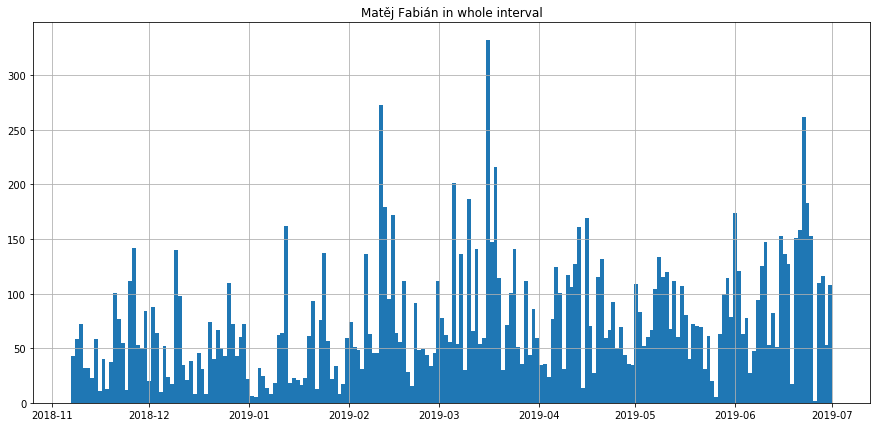

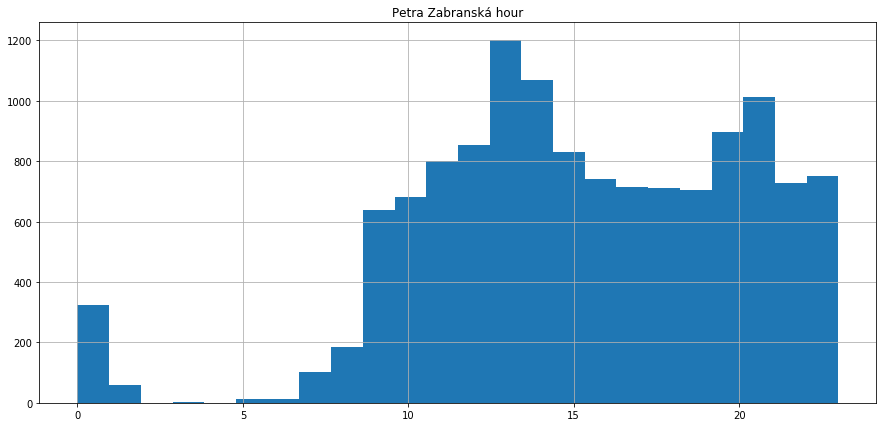

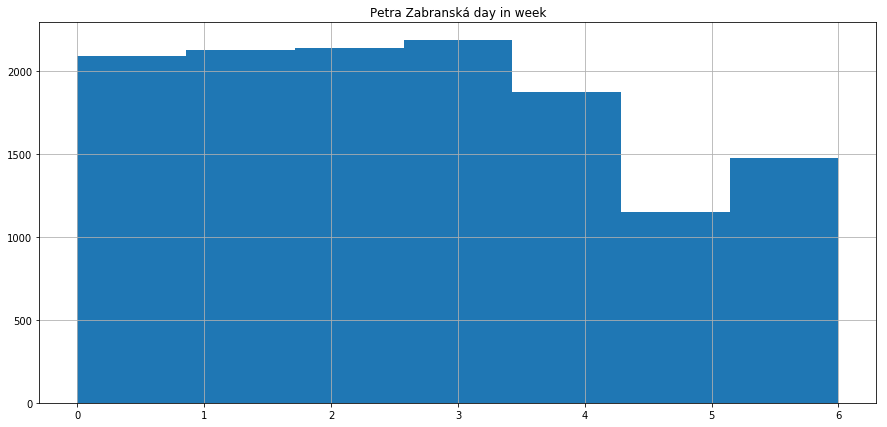

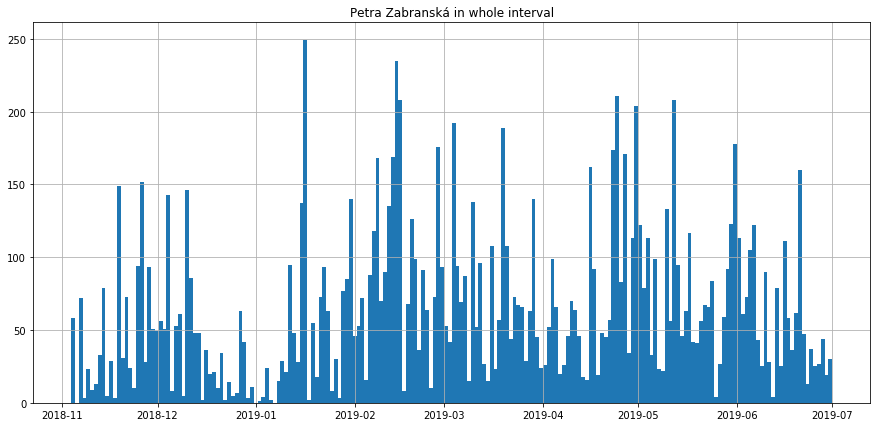

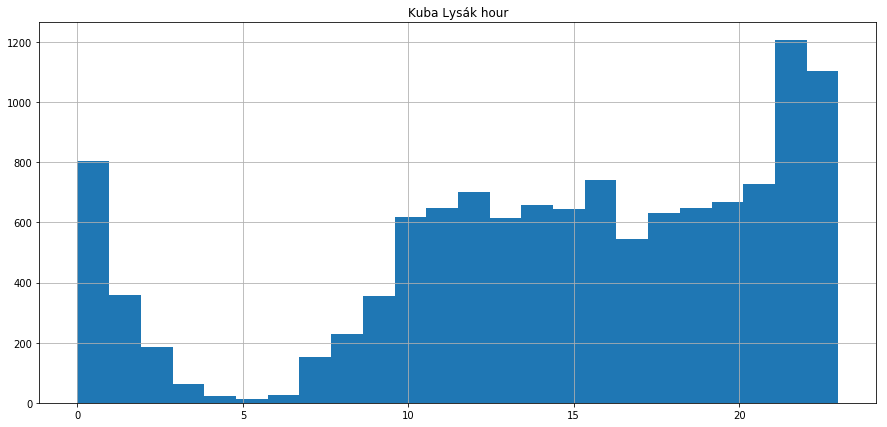

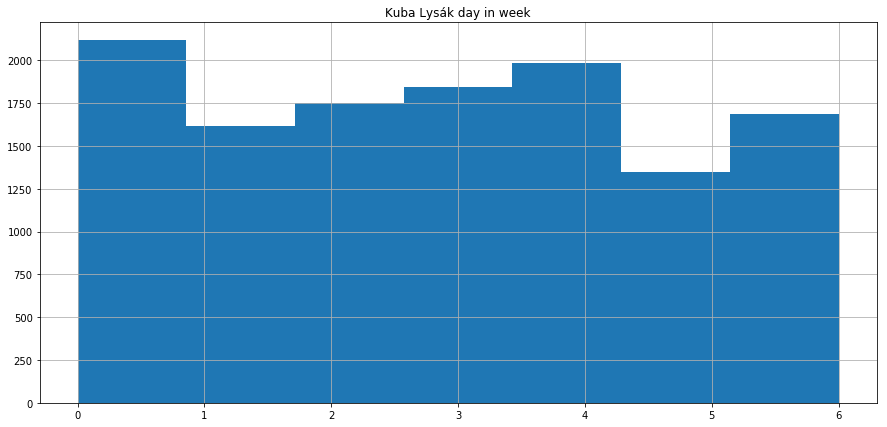

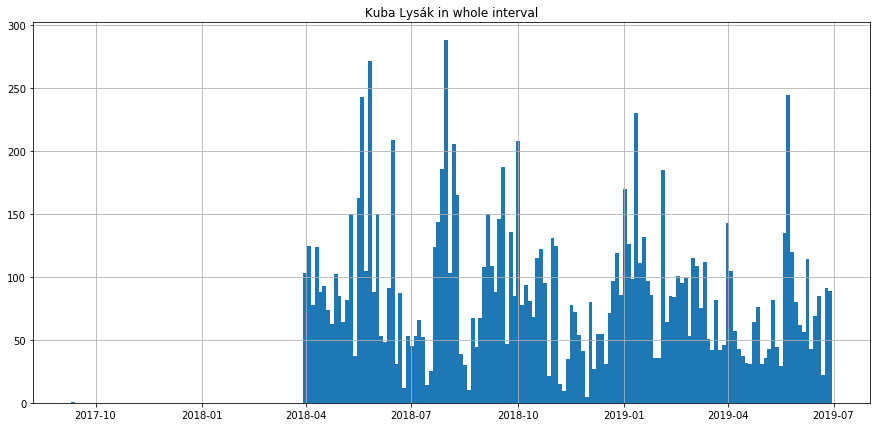

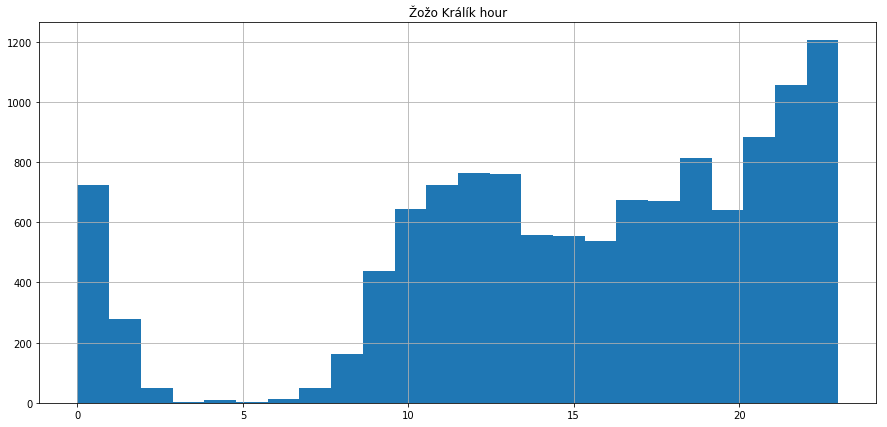

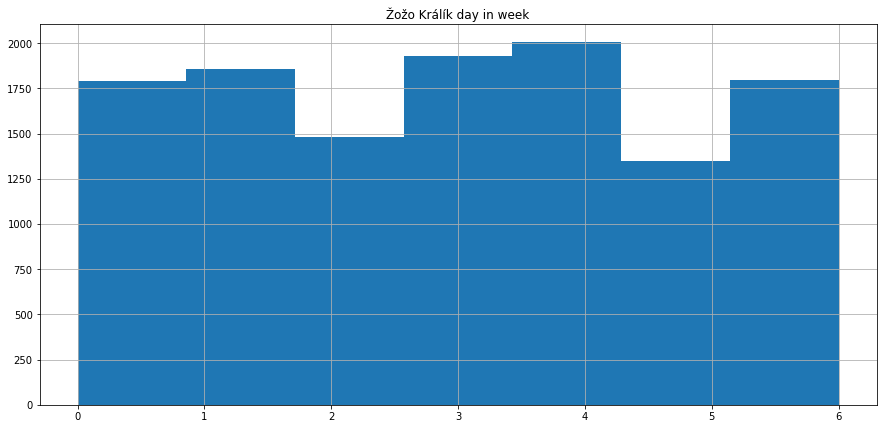

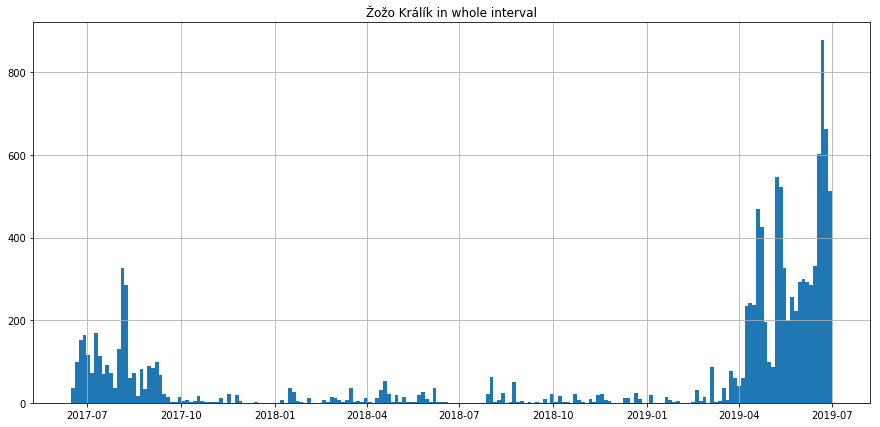

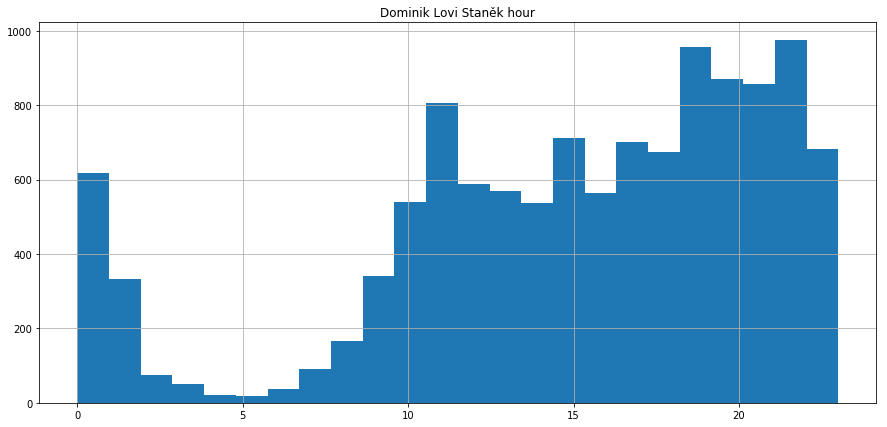

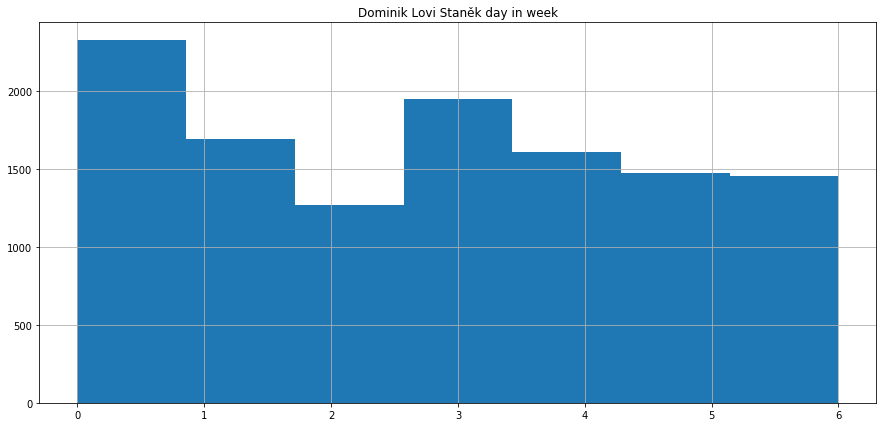

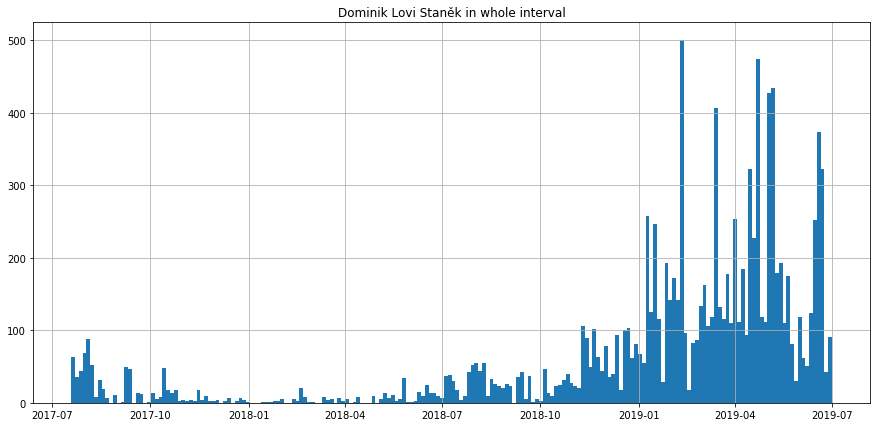

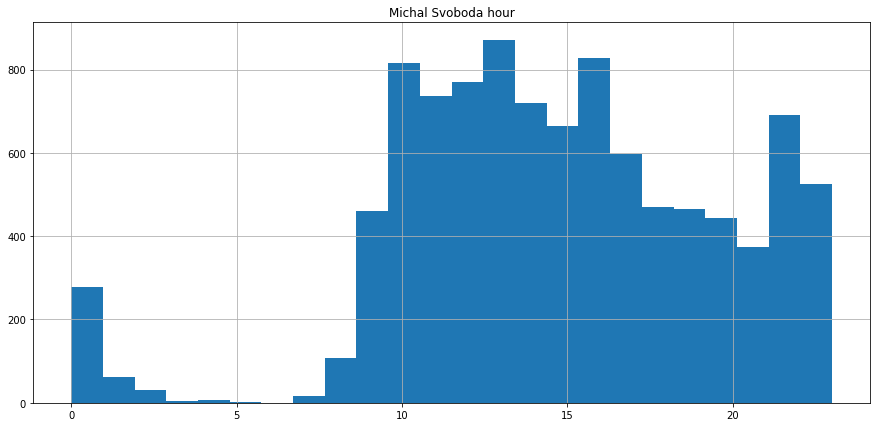

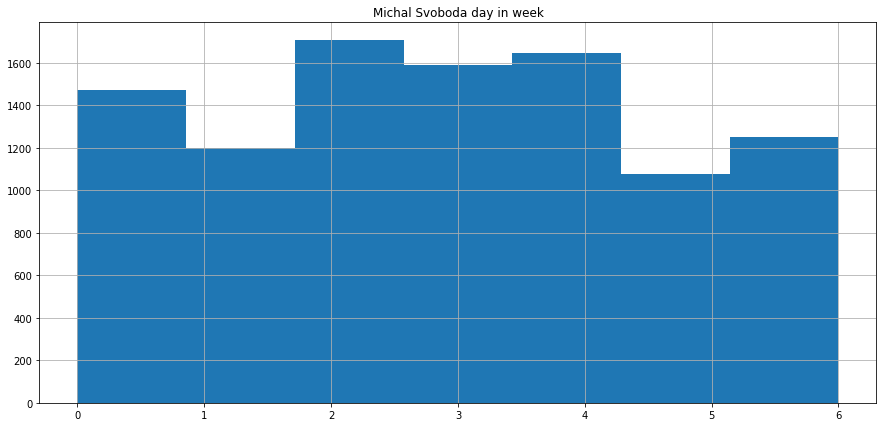

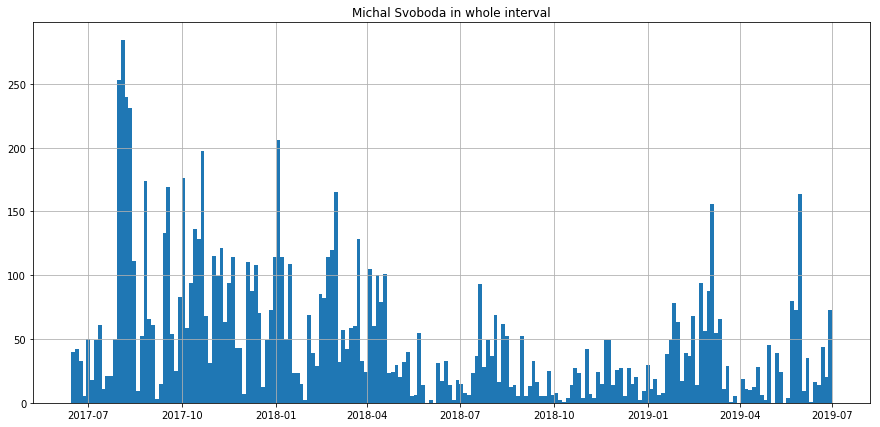

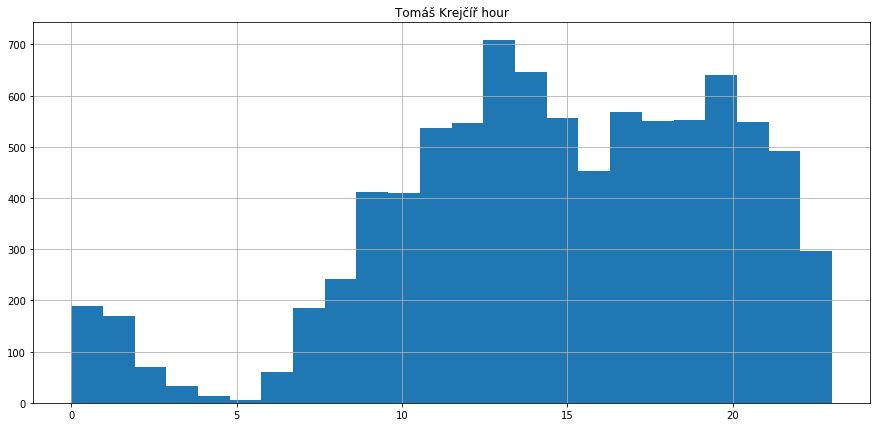

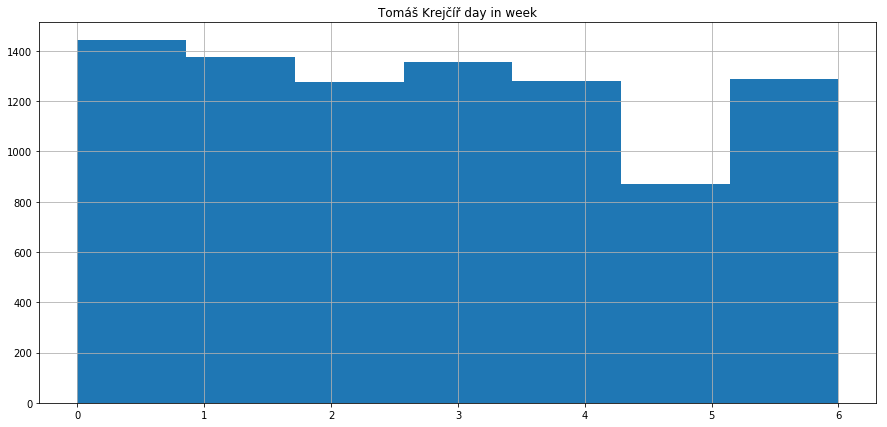

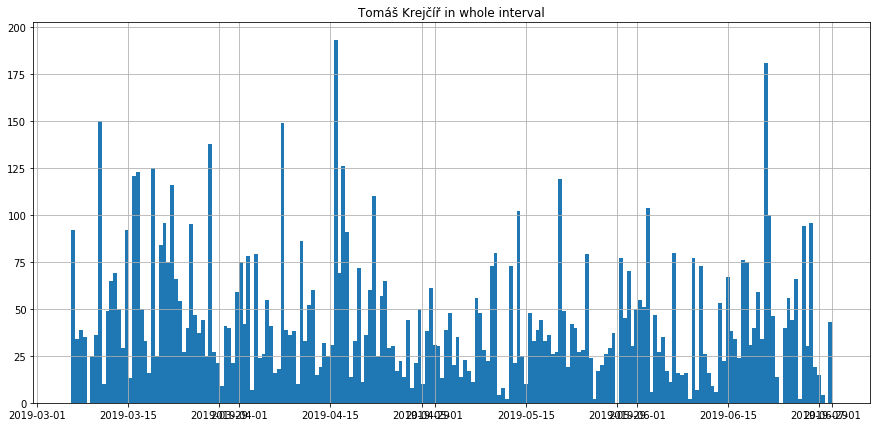

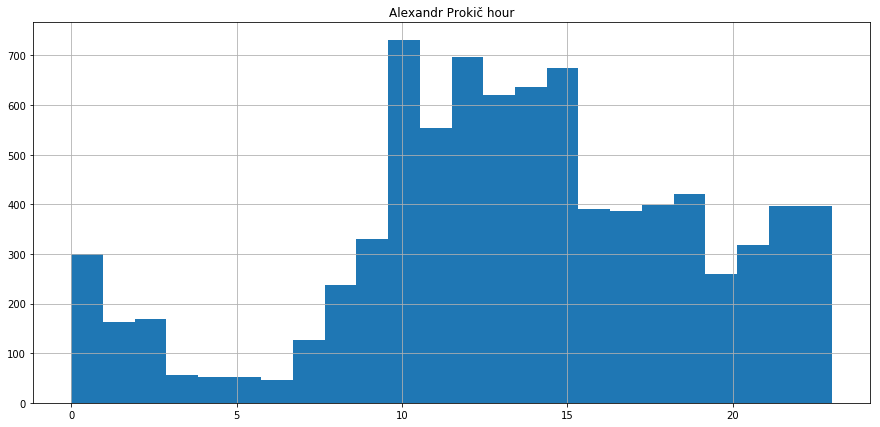

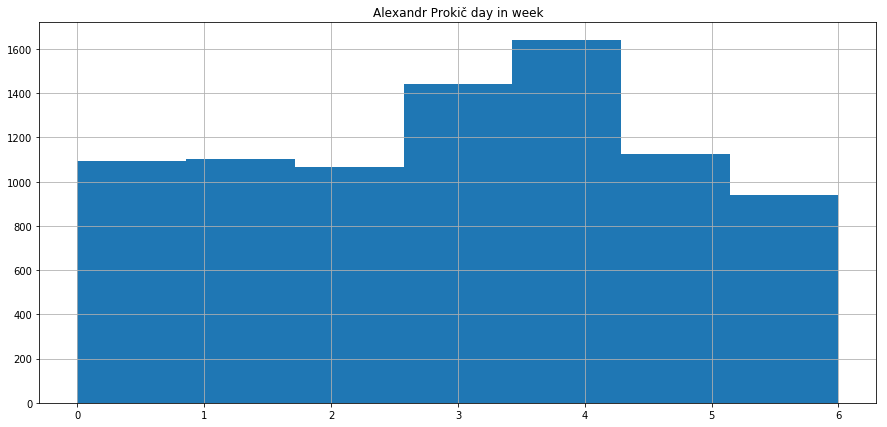

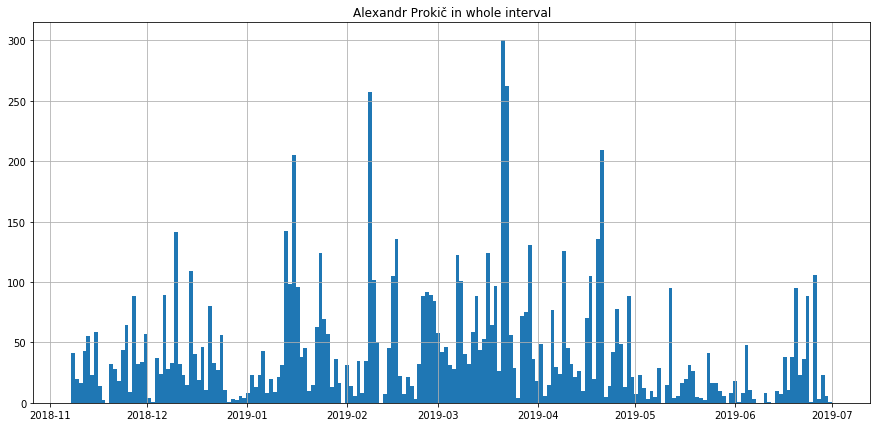

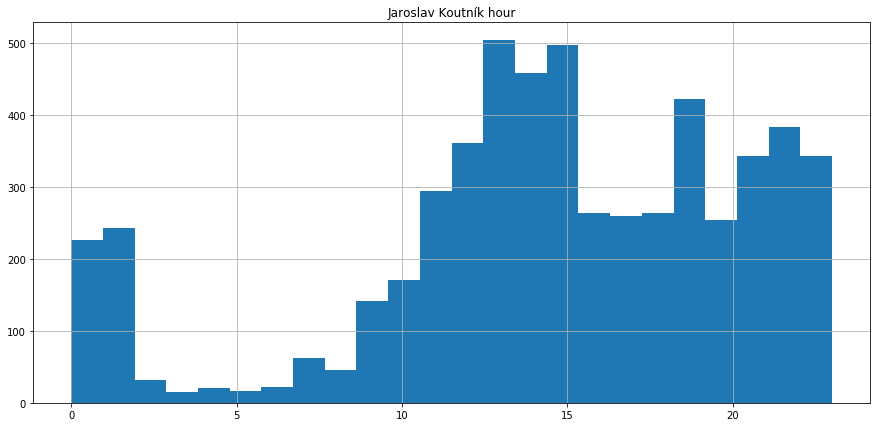

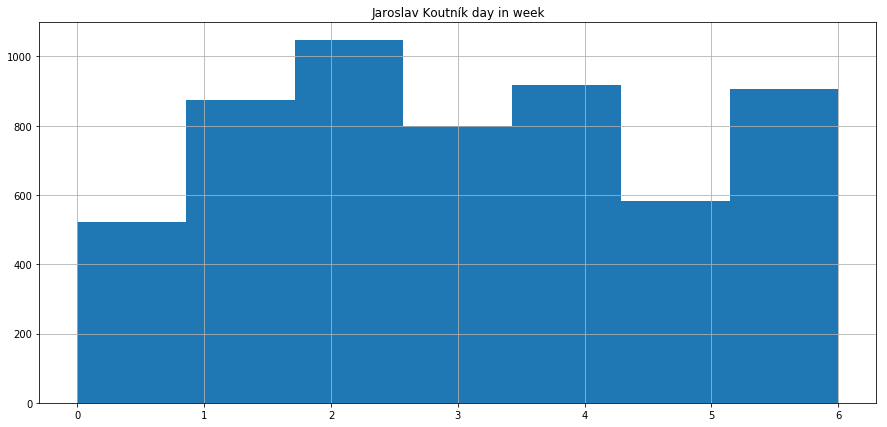

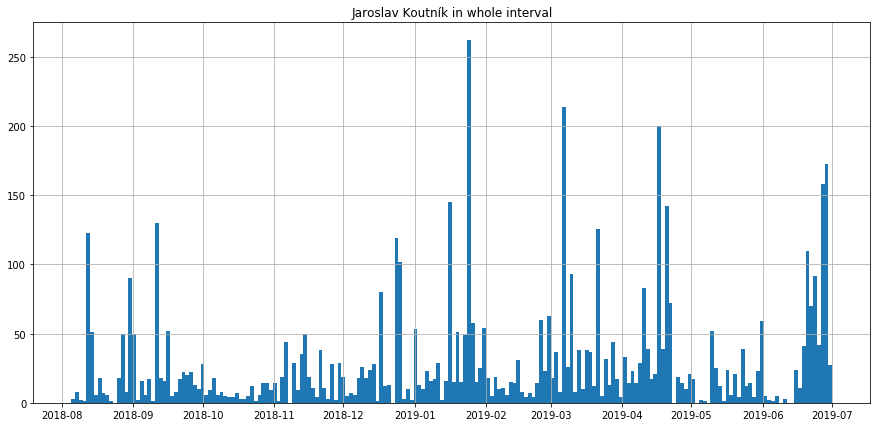

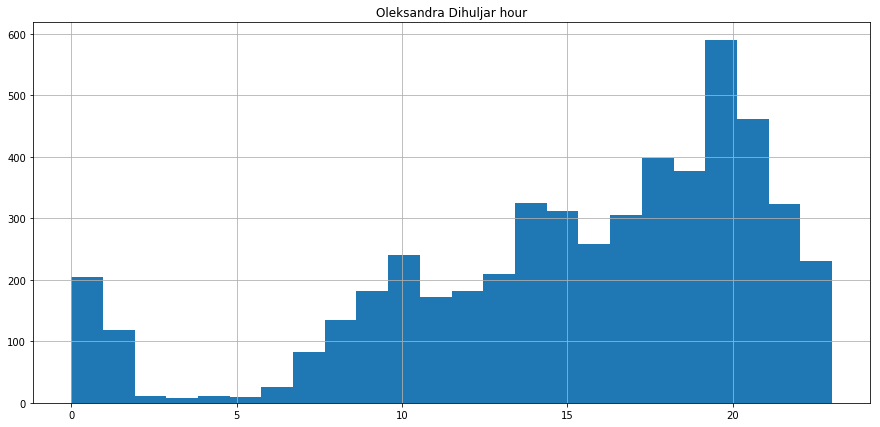

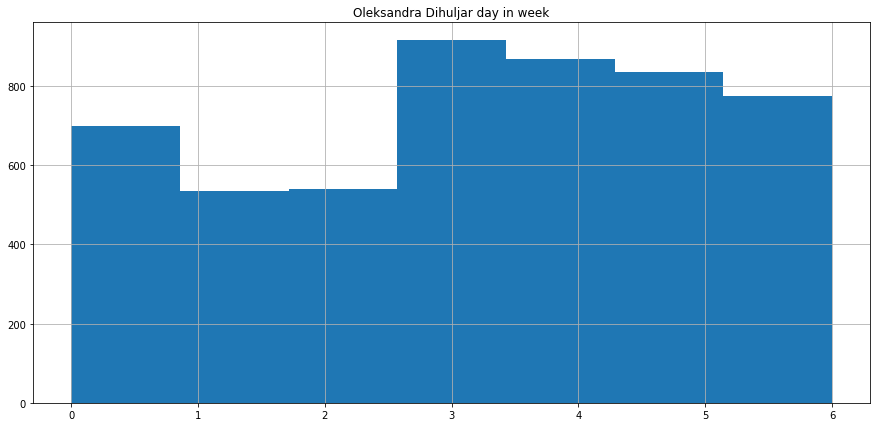

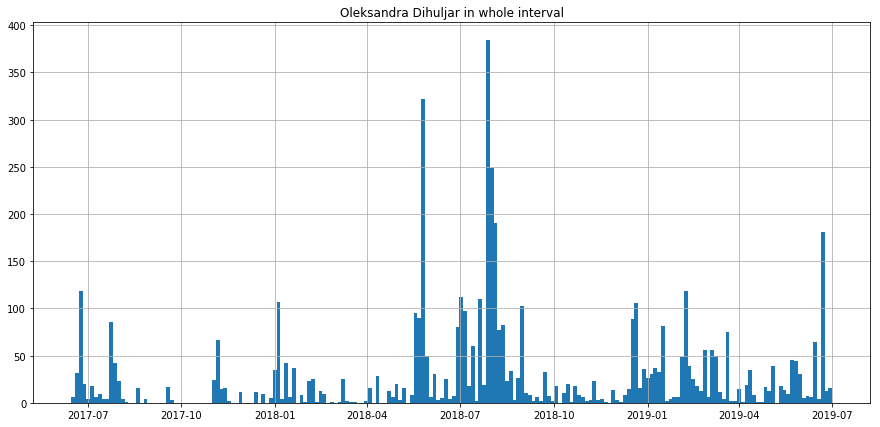

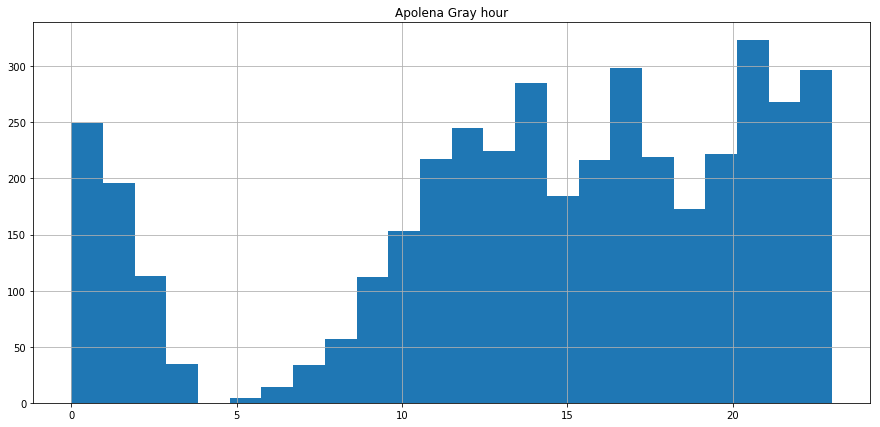

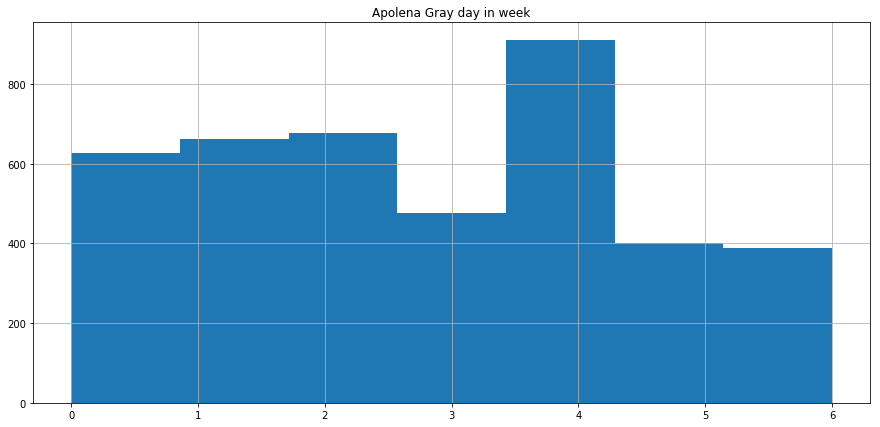

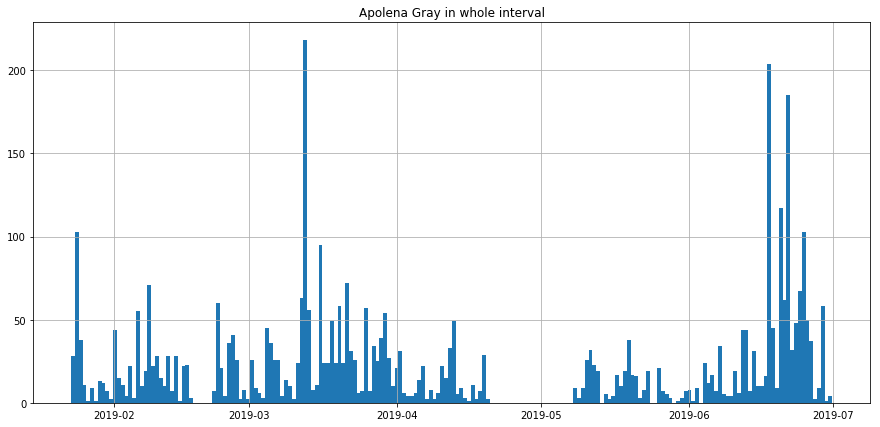

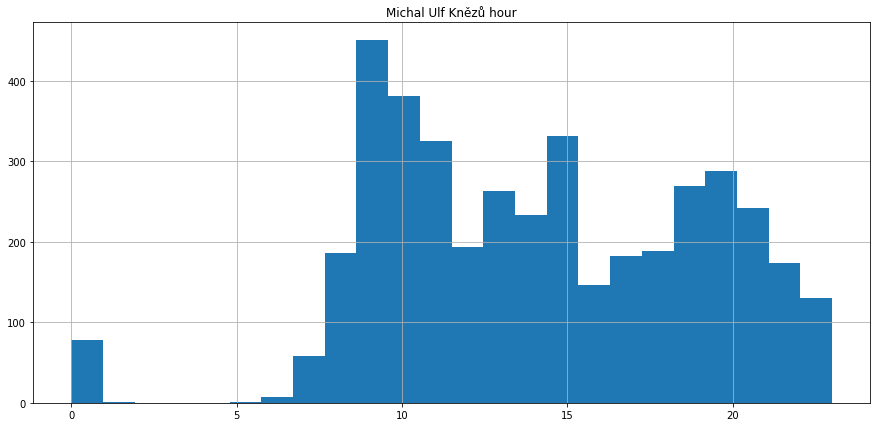

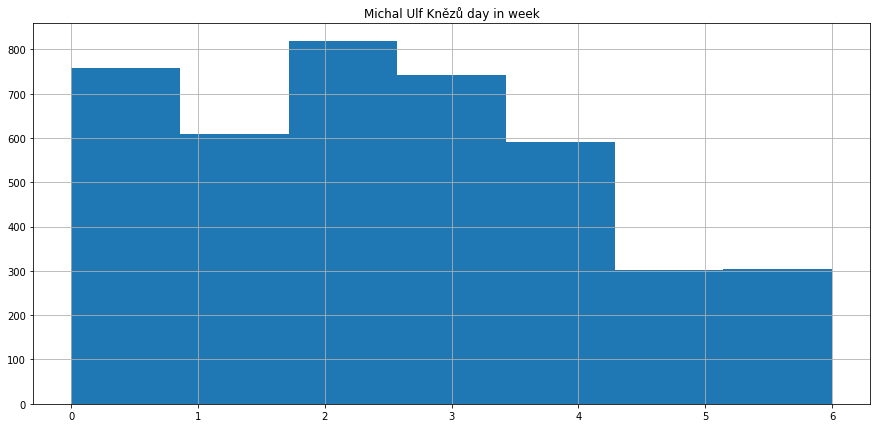

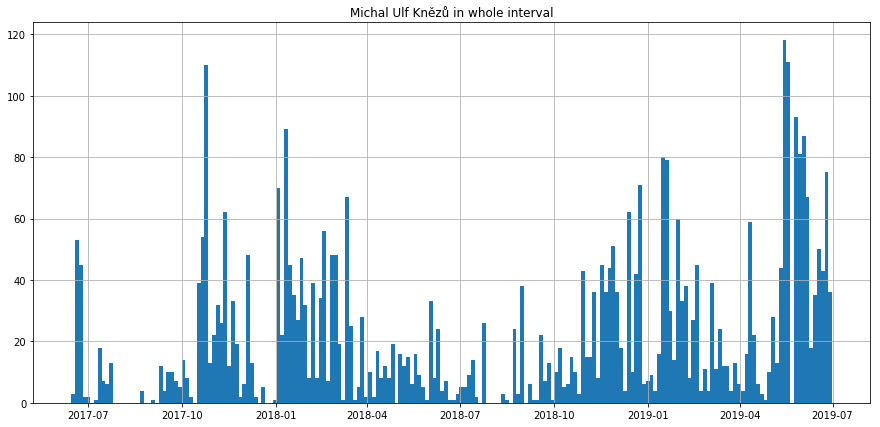

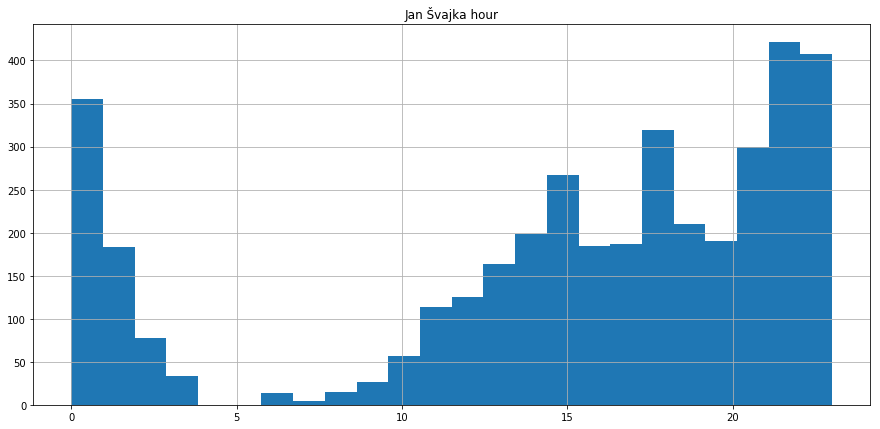

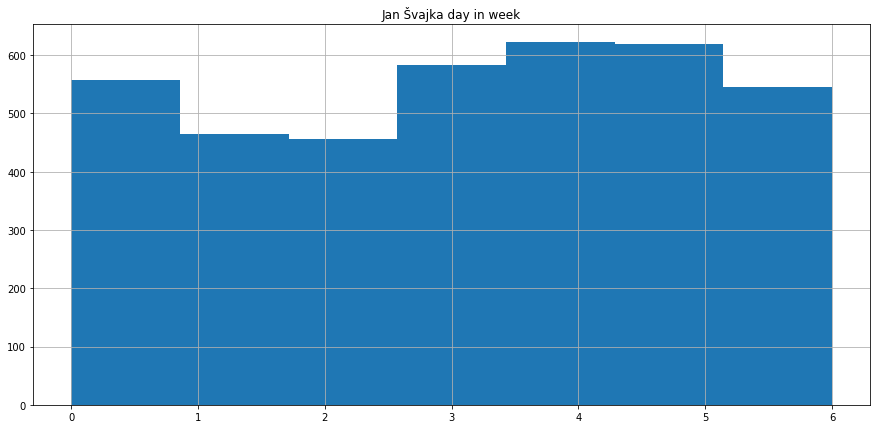

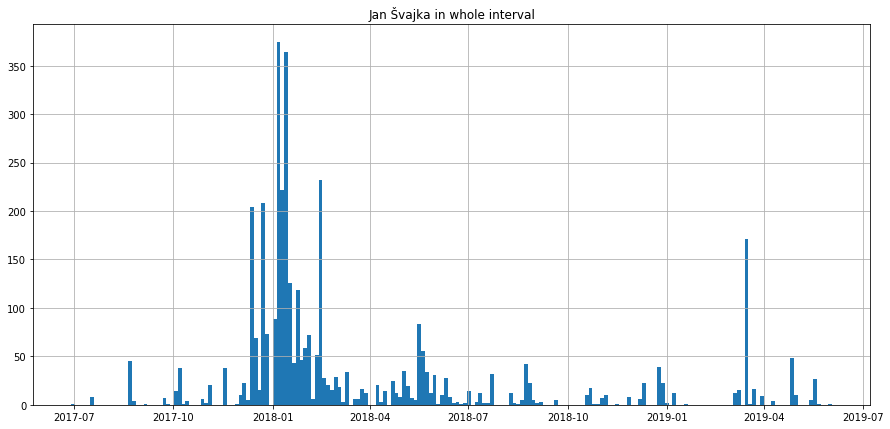

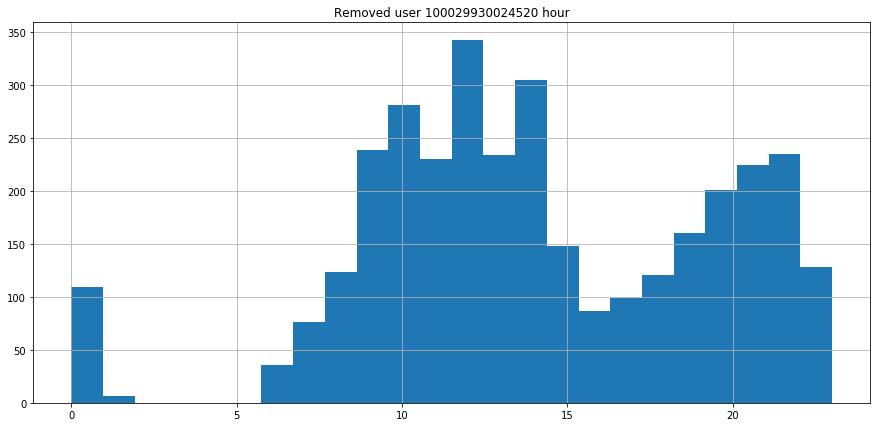

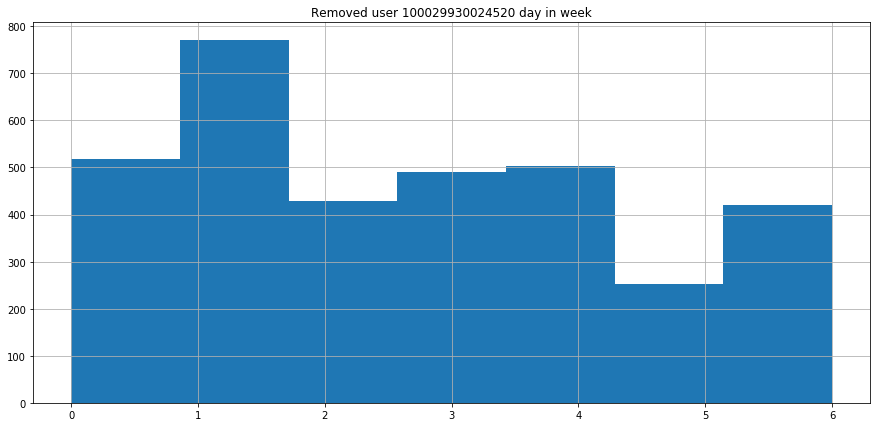

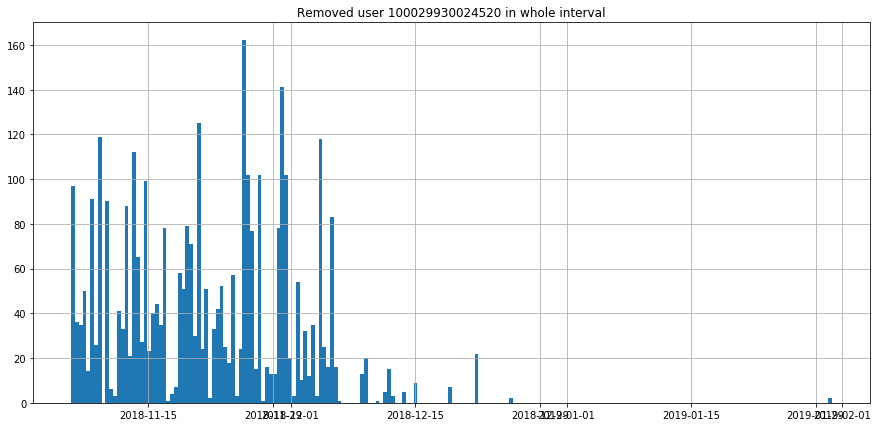

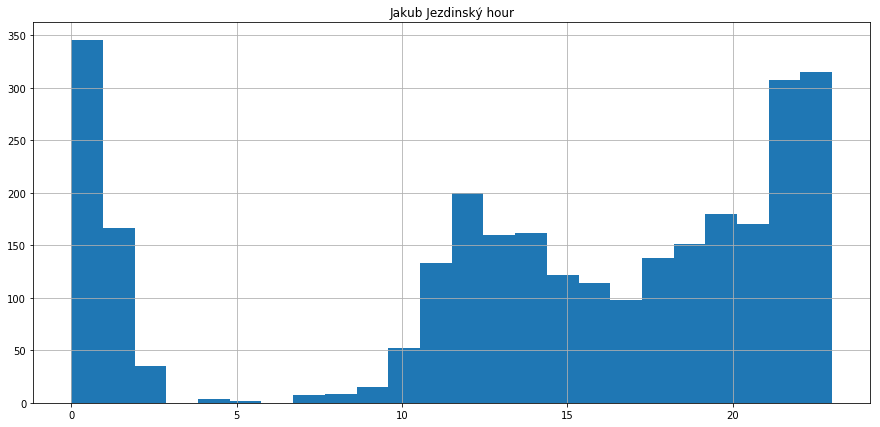

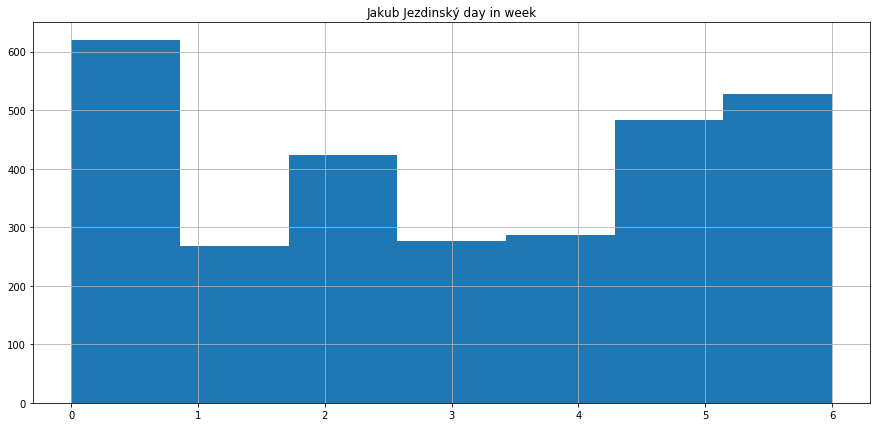

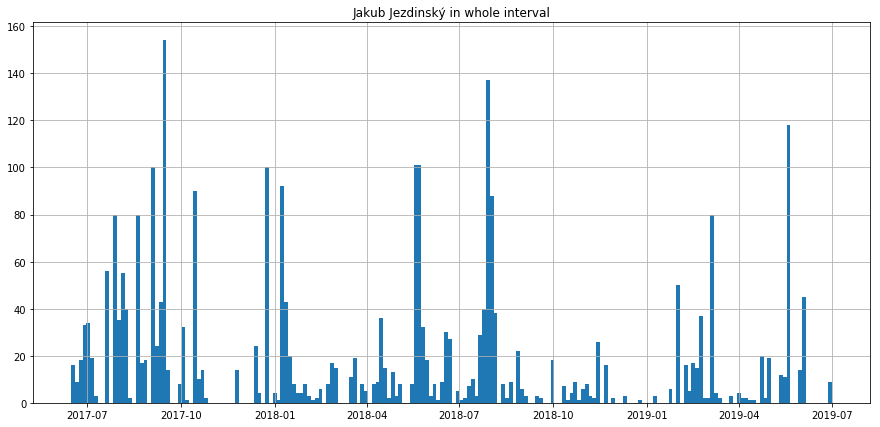

In [303]:
for username in df['UserName'].value_counts()[:30].index:
    plt.figure(figsize=(15, 7))
    plt.title(username + ' hour')
    df[df['UserName'] == username]['DateTime'].dt.hour.hist(bins=24)
    plt.figure(figsize=(15, 7))
    plt.title(username + ' day in week')
    df[df['UserName'] == username]['DateTime'].dt.dayofweek.hist(bins=7)
    plt.figure(figsize=(15, 7))
    plt.title(username + ' in whole interval')
    df[df['UserName'] == username]['DateTime'].hist(bins=200)
    # plt.figure(figsize=(15, 7))
    # plt.title(username + ' hour in week')
    # (df[df['UserName'] == username]['DateTime'].dt.dayofweek * 24 + df[df['UserName'] == username]['DateTime'].dt.hour).hist(bins=24 * 7)

### Analyzing how people interact with each other
Counting next message below X minutes threshold as an interaction. 


In [304]:
df = df.sort_values('DateTime')


In [305]:
df['DateTime'].diff().iloc[1:]

1        00:00:01
2        00:00:08
3        00:00:04
4        00:00:03
5        00:00:03
6        00:00:03
7        00:00:02
8        00:00:02
9        00:00:04
10       00:00:06
11       00:00:04
12       00:00:01
13       00:00:01
14       00:00:44
15       00:00:18
16       00:00:24
17       00:00:18
18       00:01:00
19       00:01:10
20       00:00:09
21       00:00:16
22       00:00:38
23       00:01:00
24       00:01:28
25       00:00:06
26       00:04:44
27       00:06:35
28       00:00:03
29       00:08:51
30       00:00:56
           ...   
592818   00:00:37
592819   00:00:54
592820   00:01:19
592821   00:00:02
592822   00:01:22
592823   00:00:56
592824   00:00:23
592825   00:00:22
592826   00:00:04
592827   00:01:00
592828   00:01:54
592829   00:00:01
592830   00:00:20
592831   00:00:01
592832   00:03:12
592833   00:02:16
592834   00:00:02
592835   00:00:16
592836   00:01:19
592837   00:00:48
592838   00:09:52
592839   00:02:35
592840   00:00:05
592841   00:00:05
592842   0

In [529]:
diff_sec = df['DateTime'].diff().iloc[1:].dt.total_seconds()    # type: pd.Series
diff_sec

1           1.0
2           8.0
3           4.0
4           3.0
5           3.0
6           3.0
7           2.0
8           2.0
9           4.0
10          6.0
11          4.0
12          1.0
13          1.0
14         44.0
15         18.0
16         24.0
17         18.0
18         60.0
19         70.0
20          9.0
21         16.0
22         38.0
23         60.0
24         88.0
25          6.0
26        284.0
27        395.0
28          3.0
29        531.0
30         56.0
          ...  
592818     37.0
592819     54.0
592820     79.0
592821      2.0
592822     82.0
592823     56.0
592824     23.0
592825     22.0
592826      4.0
592827     60.0
592828    114.0
592829      1.0
592830     20.0
592831      1.0
592832    192.0
592833    136.0
592834      2.0
592835     16.0
592836     79.0
592837     48.0
592838    592.0
592839    155.0
592840      5.0
592841      5.0
592842     50.0
592843     35.0
592844    191.0
592845     54.0
592846      1.0
592847     28.0
Name: DateTime, Length: 

In [530]:
diff_sec.value_counts()

3.0        30821
2.0        30771
4.0        29932
5.0        28297
1.0        27351
6.0        26312
7.0        23617
8.0        21415
9.0        19708
10.0       17809
11.0       16242
12.0       14856
0.0        13619
13.0       13565
14.0       12468
15.0       11259
16.0       10211
17.0        9489
18.0        8693
19.0        8121
20.0        7513
21.0        6780
22.0        6342
23.0        5837
24.0        5593
25.0        5089
26.0        4905
27.0        4494
28.0        4270
29.0        4011
           ...  
3183.0         1
12724.0        1
3072.0         1
3179.0         1
7347.0         1
3177.0         1
12702.0        1
12698.0        1
3174.0         1
4613.0         1
4618.0         1
3836.0         1
16120.0        1
18326.0        1
18340.0        1
12801.0        1
5440.0         1
18338.0        1
3199.0         1
3198.0         1
3197.0         1
4586.0         1
4598.0         1
4587.0         1
4591.0         1
4597.0         1
3191.0         1
12762.0       

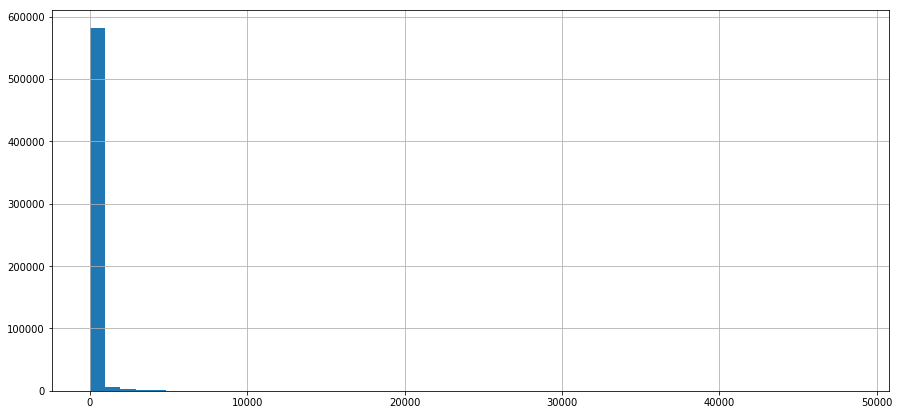

In [531]:
diff_sec.hist(bins=50, figsize=(15, 7))

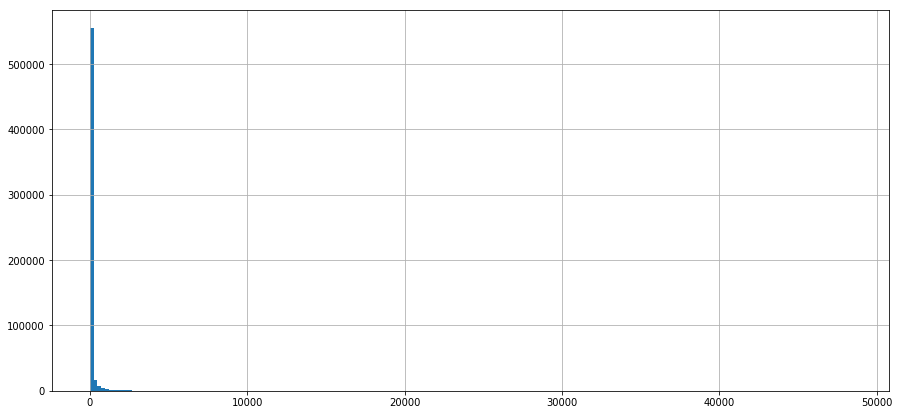

In [532]:
diff_sec.hist(bins=200, figsize=(15, 7))

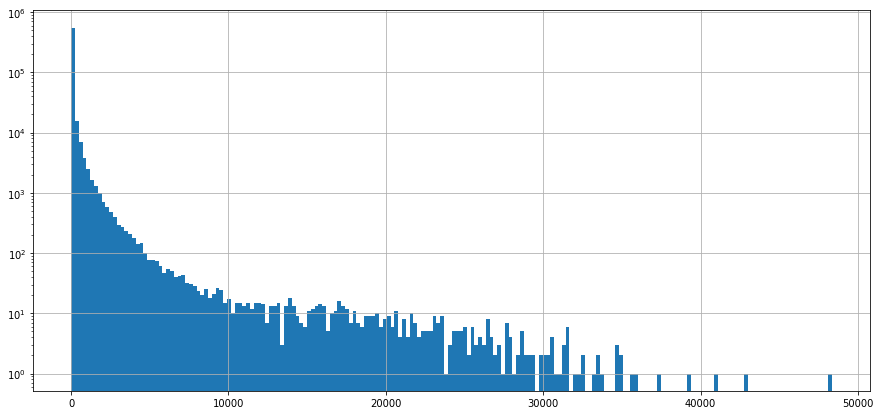

In [533]:
diff_sec.hist(bins=200, figsize=(15, 7), log=True)

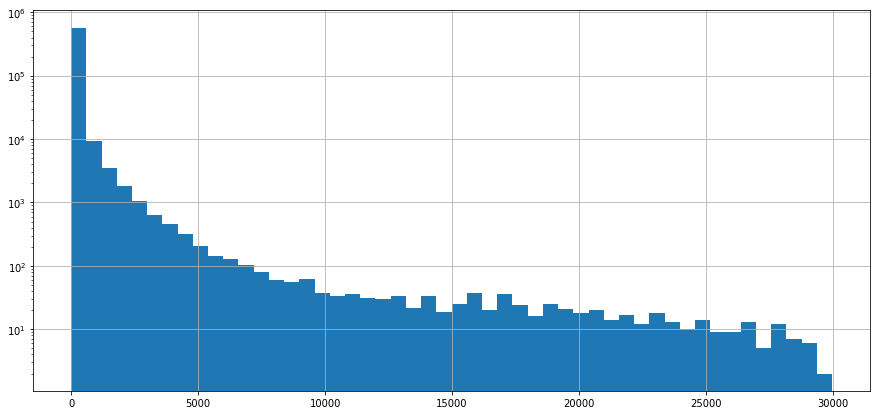

In [534]:
diff_sec[diff_sec < 30000].hist(bins=50, figsize=(15, 7), log=True)

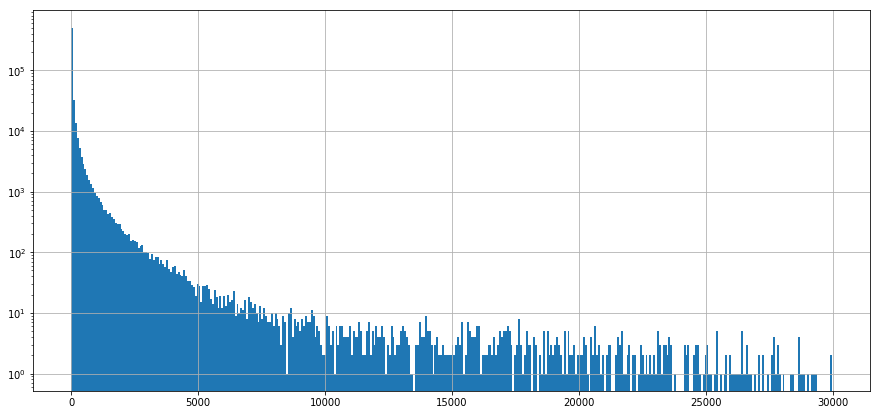

In [535]:
diff_sec[diff_sec < 30000].hist(bins=400, figsize=(15, 7), log=True)

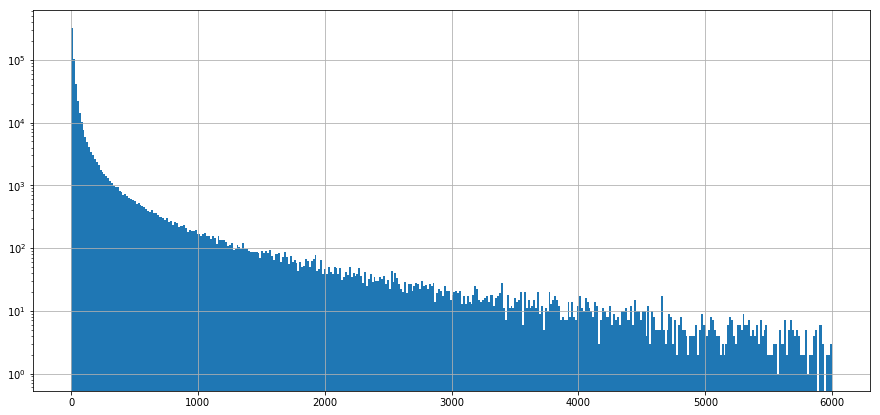

In [536]:
diff_sec[diff_sec < 6000].hist(bins=400, figsize=(15, 7), log=True)

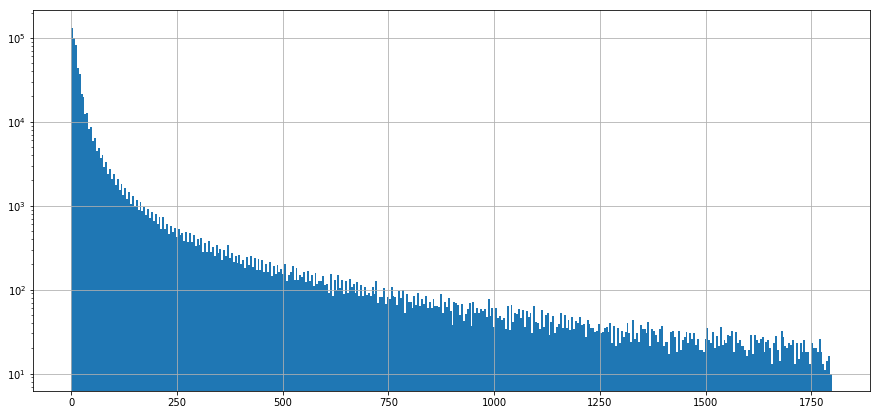

In [537]:
diff_sec[diff_sec < 1800].hist(bins=400, figsize=(15, 7), log=True)

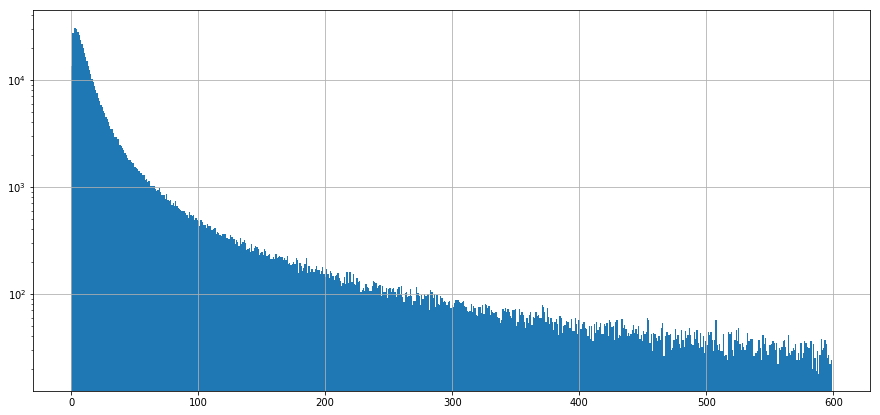

In [538]:
diff_sec[diff_sec < 600].hist(bins=600, figsize=(15, 7), log=True)

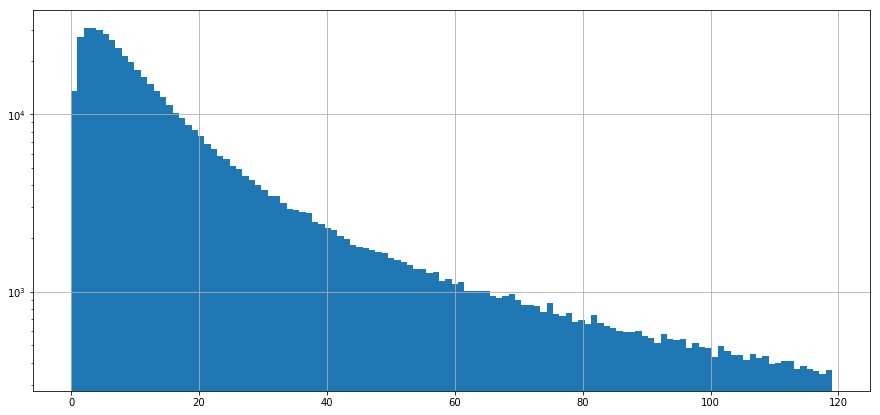

In [539]:
diff_sec[diff_sec < 120].hist(bins=120, figsize=(15, 7), log=True)

In [540]:
diff_sec.median()

12.0

In [541]:
list(np.arange(0., 1.1, .2))

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]

In [542]:
diff_sec.quantile(np.arange(0., 1.01, .02))

0.00        0.0
0.02        0.0
0.04        1.0
0.06        1.0
0.08        2.0
0.10        2.0
0.12        2.0
0.14        3.0
0.16        3.0
0.18        4.0
0.20        4.0
0.22        4.0
0.24        5.0
0.26        5.0
0.28        6.0
0.30        6.0
0.32        7.0
0.34        7.0
0.36        8.0
0.38        8.0
0.40        9.0
0.42        9.0
0.44       10.0
0.46       11.0
0.48       11.0
0.50       12.0
0.52       13.0
0.54       14.0
0.56       15.0
0.58       16.0
0.60       17.0
0.62       19.0
0.64       20.0
0.66       22.0
0.68       24.0
0.70       26.0
0.72       29.0
0.74       32.0
0.76       36.0
0.78       41.0
0.80       47.0
0.82       55.0
0.84       65.0
0.86       79.0
0.88       99.0
0.90      129.0
0.92      178.0
0.94      266.0
0.96      449.0
0.98      953.0
1.00    48346.0
Name: DateTime, dtype: float64

Looks like 120 seconds will be a good threshold for marking message as part of an interaction.


In [578]:
cutoff_time = 60

In [579]:
responders = df[df['DateTime'].diff() < datetime.timedelta(seconds=cutoff_time)]
receivers = responders.shift(1)

In [580]:
receivers.iloc[0] = df.loc[responders.index[0] - 1]
receivers['UserID'] = receivers['UserID'].astype(np.int64)

In [581]:
receivers.head(5)

,UserID,UserName,MessageBody,DateTime
1,1764877696,Michal Svoboda,Za celý prázdniny,2017-06-14 14:46:39
2,100000219586446,Daniel Lečo Le,Pak nejaky videjka a fotecky pls,2017-06-14 14:46:40
3,100000455812182,Lukáš Aaron Tesař,jsem si uvědomil jednu věc,2017-06-14 14:46:48
4,100000455812182,Lukáš Aaron Tesař,budu chlastat 23.,2017-06-14 14:46:52
5,100000455812182,Lukáš Aaron Tesař,pak 8.,2017-06-14 14:46:55


In [582]:
responders.head(5)

,UserID,UserName,MessageBody,DateTime
1,100000219586446,Daniel Lečo Le,Pak nejaky videjka a fotecky pls,2017-06-14 14:46:40
2,100000455812182,Lukáš Aaron Tesař,jsem si uvědomil jednu věc,2017-06-14 14:46:48
3,100000455812182,Lukáš Aaron Tesař,budu chlastat 23.,2017-06-14 14:46:52
4,100000455812182,Lukáš Aaron Tesař,pak 8.,2017-06-14 14:46:55
5,100000455812182,Lukáš Aaron Tesař,a pak na Adviku,2017-06-14 14:46:58


In [583]:
receivers.head(26).tail(5)

,UserID,UserName,MessageBody,DateTime
28,100000317424041,Filip Tran,náš server,2017-06-14 14:54:52
30,1764877696,Michal Svoboda,Yee boi,2017-06-14 15:06:14
32,100002391881569,Jirka Sasi Chovanec,Pičus,2017-06-14 15:16:01
35,100000186401044,Lucas Dičér,NaN,2017-06-14 15:24:24
37,100000219586446,Daniel Lečo Le,This might be good,2017-06-14 16:20:46


In [584]:
responders.head(26).tail(5)

,UserID,UserName,MessageBody,DateTime
28,1764877696,Michal Svoboda,Yee boi,2017-06-14 15:06:14
30,100002391881569,Jirka Sasi Chovanec,Pičus,2017-06-14 15:16:01
32,100000186401044,Lucas Dičér,NaN,2017-06-14 15:24:24
35,100000219586446,Daniel Lečo Le,This might be good,2017-06-14 16:20:46
37,100000186401044,Lucas Dičér,Čo to je zač?,2017-06-14 16:25:08


In [585]:
connections = pd.concat((responders['UserID'].rename('responder'), receivers['UserID'].rename('receiver')), axis=1)
connections['weight'] = 1
connections['mess'] = responders['MessageBody']
connections

,responder,receiver,weight,mess
1,100000219586446,1764877696,1,Pak nejaky videjka a fotecky pls
2,100000455812182,100000219586446,1,jsem si uvědomil jednu věc
3,100000455812182,100000455812182,1,budu chlastat 23.
4,100000455812182,100000455812182,1,pak 8.
5,100000455812182,100000455812182,1,a pak na Adviku
6,100000219586446,100000455812182,1,Kdy je ta parba u Furika btw?
7,100000455812182,100000219586446,1,a jestli bude i Igorrr
8,100000455812182,100000455812182,1,no do píči :D
9,100000455812182,100000455812182,1,co vole?
10,100000455812182,100000455812182,1,žádnou další pařbu už ne plz xd


In [586]:
df['UserName'].unique().size

107

In [587]:
# making connections symmetric
connections_one = connections
connections_two = connections_one.copy()
cols = connections_two.columns
connections_two.columns = [cols[1], cols[0], cols[2], cols[3]]

In [588]:
connections = pd.concat((connections_one, connections_two), sort=True)
connections

,mess,receiver,responder,weight
1,Pak nejaky videjka a fotecky pls,1764877696,100000219586446,1
2,jsem si uvědomil jednu věc,100000219586446,100000455812182,1
3,budu chlastat 23.,100000455812182,100000455812182,1
4,pak 8.,100000455812182,100000455812182,1
5,a pak na Adviku,100000455812182,100000455812182,1
6,Kdy je ta parba u Furika btw?,100000455812182,100000219586446,1
7,a jestli bude i Igorrr,100000219586446,100000455812182,1
8,no do píči :D,100000455812182,100000455812182,1
9,co vole?,100000455812182,100000455812182,1
10,žádnou další pařbu už ne plz xd,100000455812182,100000455812182,1


In [589]:
conn_weights = connections.groupby(['responder', 'receiver'])['weight'].count()
conn_weights

responder        receiver       
1125265386       1125265386         780
                 1556658182          74
                 1656188257          16
                 1680420194           8
                 1764877696          97
                 1814478788         148
                 1827406448          14
                 100000067805883    109
                 100000108467197      4
                 100000186401044     90
                 100000219586446     47
                 100000286707826     14
                 100000317424041    280
                 100000326531136     35
                 100000340400116    118
                 100000360354517     89
                 100000449818179     67
                 100000455812182     81
                 100000525981740     23
                 100000536654474      1
                 100000554589395    181
                 100000857560331    123
                 100001076445986    114
                 100001152637775     19
       

In [591]:
# with < I am excluding references to itself
one_half_indices = conn_weights.index.get_level_values(0) < conn_weights.index.get_level_values(1)
one_half_indices.size

3833

In [592]:
edge_weights = conn_weights[one_half_indices]
edge_weights

responder        receiver       
1125265386       1556658182          74
                 1656188257          16
                 1680420194           8
                 1764877696          97
                 1814478788         148
                 1827406448          14
                 100000067805883    109
                 100000108467197      4
                 100000186401044     90
                 100000219586446     47
                 100000286707826     14
                 100000317424041    280
                 100000326531136     35
                 100000340400116    118
                 100000360354517     89
                 100000449818179     67
                 100000455812182     81
                 100000525981740     23
                 100000536654474      1
                 100000554589395    181
                 100000857560331    123
                 100001076445986    114
                 100001152637775     19
                 100001242660072      5
       

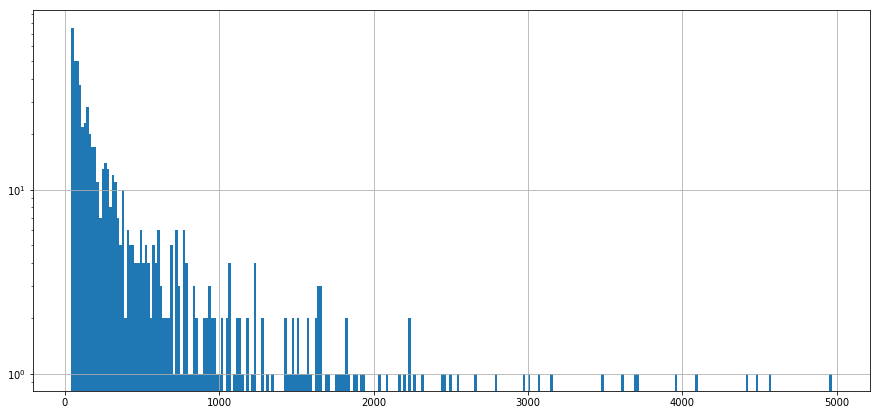

In [617]:
edge_weights.hist(bins=300, log=True, figsize=(15, 7))

(0, 300)

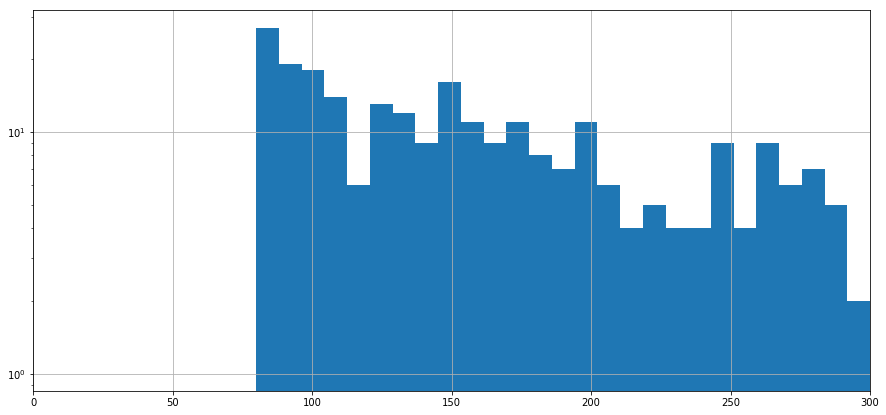

In [623]:
edge_weights.hist(bins=600, log=True, figsize=(15, 7))
plt.xlim(0, 300)

In [624]:
# cutting off not few interactions
min_replies = 100
edge_weights = edge_weights[edge_weights >= min_replies]

#### making user if to username map

In [625]:
df['UserID'].unique().size

99

In [626]:
df['UserName'].unique().size

107

In [627]:
id_and_name = df.groupby(['UserID', 'UserName']).count().index.to_frame().reset_index(drop=True)

def select_name(x):
    if len(x) > 1:
        return x[~x.str.match('Removed user')]
    return x

id_to_name = id_and_name.groupby('UserID').agg(select_name)
id_to_name

,UserName
UserID,
1125265386,Tadeáš Jojko
1336882969,Removed user 1336882969
1358283239,Removed user 1358283239
1556658182,Matěj Račinský
1656188257,Vojtěch Malman Divák
1680420194,Dominik Lovi Staněk
1690253083,Vítek Jasaň
1764877696,Michal Svoboda
1814478788,Honza Horgoš


### exporting to gephi

In [628]:
def dists_to_csv(nodes_name, edges_name, id_to_name, edge_weights):
    edges = edge_weights.reset_index().rename(columns={'responder': 'source', 'receiver': 'target'})
    nodes = id_to_name.reset_index().rename(columns={'UserID': 'id', 'UserName': 'label'})
    edges['type'] = 'undirected'
    
    nodes.to_csv(nodes_name, index=False, sep=',', encoding='utf-8')
    edges.to_csv(edges_name, index=False, sep=',', encoding='utf-8')

dists_to_csv('people.csv', f'connections_time_{cutoff_time}_min_repl_{min_replies}.csv', id_to_name, edge_weights)